# Customer Churn Prediction for PowerCo Using Machine Learning
---
This project simulates a real-world churn modeling scenario for **PowerCo**, a gas and electricity utility provider concerned about customer attrition.  
We analyze customer and pricing data to predict churn using data science techniques including **exploratory data analysis (EDA)**, **feature engineering**, and **predictive modeling**.  
The workflow concludes with the development of a **Random Forest classifier** to identify at-risk customers and guide actionable business decisions.

---

### Step 1: Import Libraries and Set Up Environment

We begin by importing essential libraries for data analysis and visualization:
- `warnings` to suppress unnecessary warnings,
- `matplotlib` and `seaborn` for plotting,
- `pandas` for data manipulation.

We also configure plot rendering within the notebook and apply a consistent Seaborn style.


In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

### Step 2: Load Datasets with Pandas

We now load the two primary datasets required for our analysis:

- `client_data.csv`, which contains customer-level features including consumption, contract, and churn information.
- `price_data.csv`, which provides monthly pricing details for various energy usage categories.

This step helps us inspect the structure of both datasets to understand data types, missing values, and potential preprocessing needs.


In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

Let's look at the first 3 rows of both dataframes to see what the data looks like

In [4]:
client_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

With the client dataset, we observe a combination of numerical and categorical features.  
These variables will require appropriate transformation during the preprocessing stage prior to modeling.


In [5]:
price_df.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

The price dataset consists entirely of numerical features; however, a significant number of values are zeros, which may affect downstream analysis and require special handling.


---

## Step 3: Descriptive Statistics of the Data

### Understanding Data Types

Before performing any transformations, it is essential to understand the structure of the dataset, including the data types of each column.  
This information guides how we handle feature engineering, especially when distinguishing between numerical, categorical, and datetime variables.


In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

We used the `.info()` method to inspect the structure of the `client_df` DataFrame.  
The dataset contains 14,606 entries across 26 columns, with no missing values.  
There are a mix of data types:  
- `float64` and `int64` for numerical features,  
- `object` for categorical or date-related columns.  

This information is crucial for guiding data cleaning and feature transformation steps.


In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


The `price_df` dataset contains 193,002 entries across 8 columns, all of which are complete (no missing values).  
While most columns are numerical (`float64`), both `id` and `price_date` are stored as objects.  
Since `price_date` represents a temporal variable, it should be converted to `datetime` format during preprocessing to enable time-based operations.


### Step 4: Summary Statistics

Now let's examine some key statistical summaries for both datasets.  
This will help us understand the central tendencies, variability, and potential anomalies within the numerical features.


In [8]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

Using the `.describe()` method, we generated summary statistics for the numerical columns in the `client_df` dataset.  
The output highlights considerable skewness in several variables, as indicated by the large gaps between the mean, median (50%), and maximum values.  
This skewness suggests that we may need to apply normalization or transformation techniques during preprocessing.


In [9]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

The `.describe()` output for `price_df` shows that all pricing variables are numeric and fall within reasonable ranges.  
While there are some zeros, particularly in `price_peak_var` and `price_mid_peak_var`, the overall distribution appears well-behaved and consistent across records.  
No immediate transformation is necessary at this stage.


---

## Step 5: Data Visualization Setup

To visually explore the churn distribution across different groups, we define two helper functions:

- `plot_stacked_bars`: Generates stacked bar charts for comparing retention vs. churn percentages.
- `annotate_stacked_bars`: Adds numerical annotations on each bar for better interpretability.

These plots will help us identify patterns in categorical segments that may be associated with customer churn.


In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### Churn

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

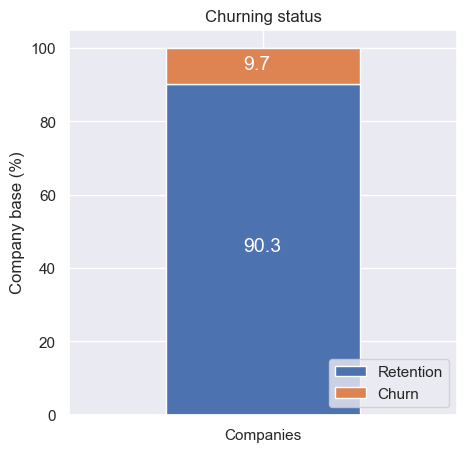

In [12]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### Churn Distribution

We visualize the overall churn distribution using a stacked bar chart.  
The `client_df` dataset shows that approximately **9.7%** of customers have churned, while **90.3%** have been retained.  
This confirms a class imbalance, which is typical in churn problems and will need to be addressed during model training.


### Sales channel

In [13]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

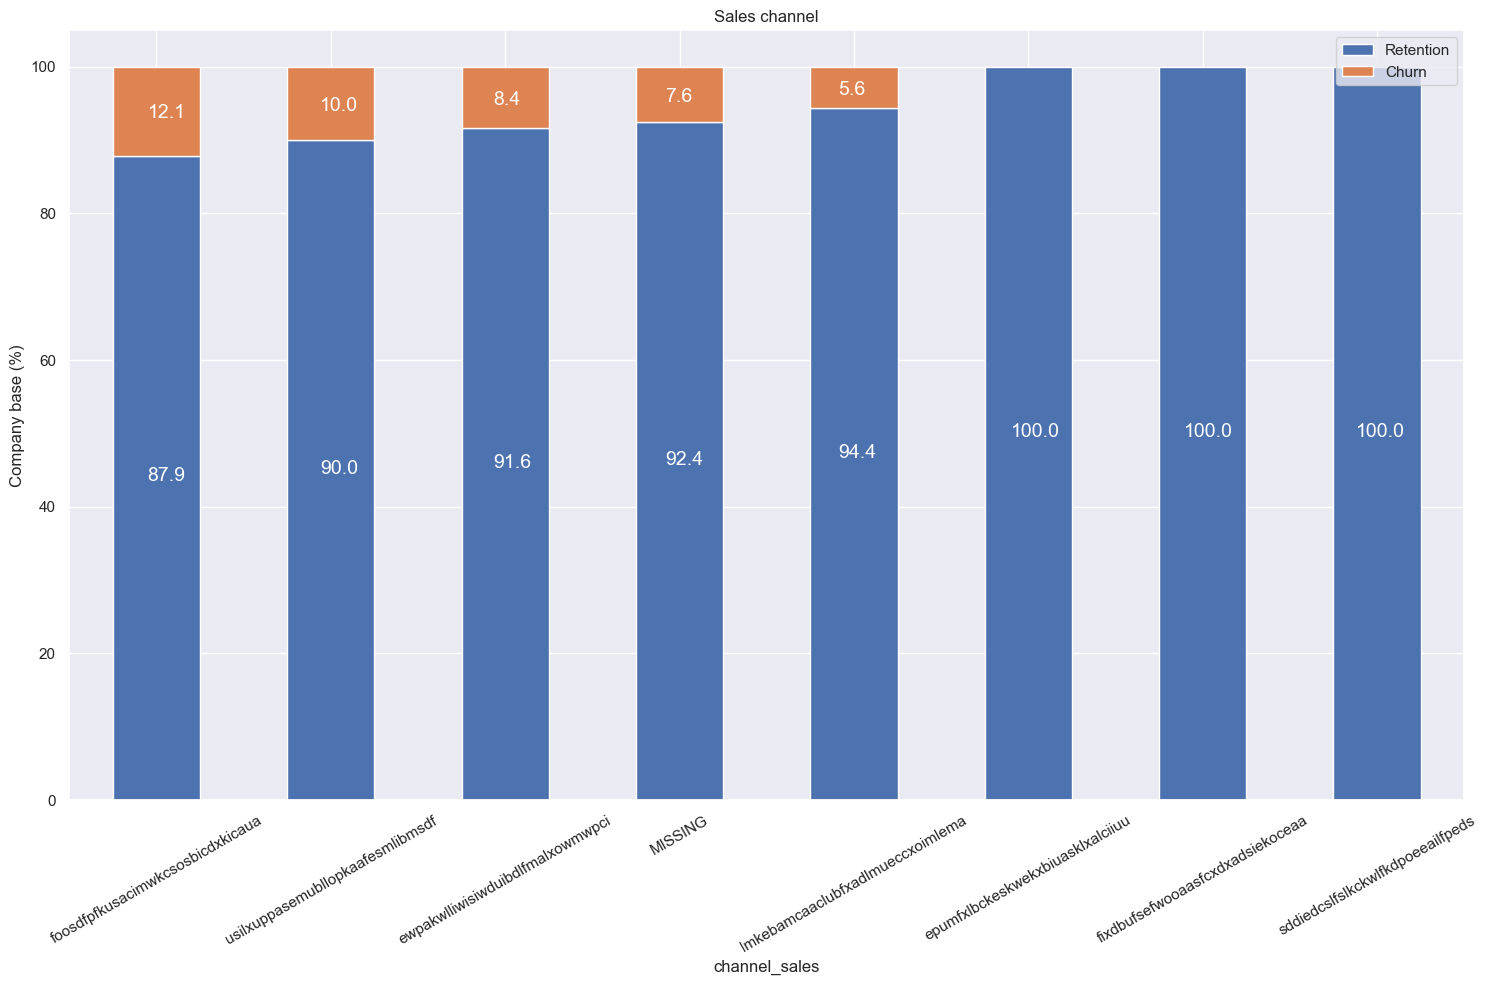

In [14]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

### Churn by Sales Channel

We examined churn distribution across different `channel_sales` categories using a stacked bar plot.  
The results show that churn is concentrated in only 5 out of the 9 available channels.

Notably, the `MISSING` category—introduced during data cleaning—accounts for 7.6% churn, which is a non-negligible proportion.  
This suggests that even missing or imputed values may carry signal and could be useful features during model training.


### Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [15]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [16]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

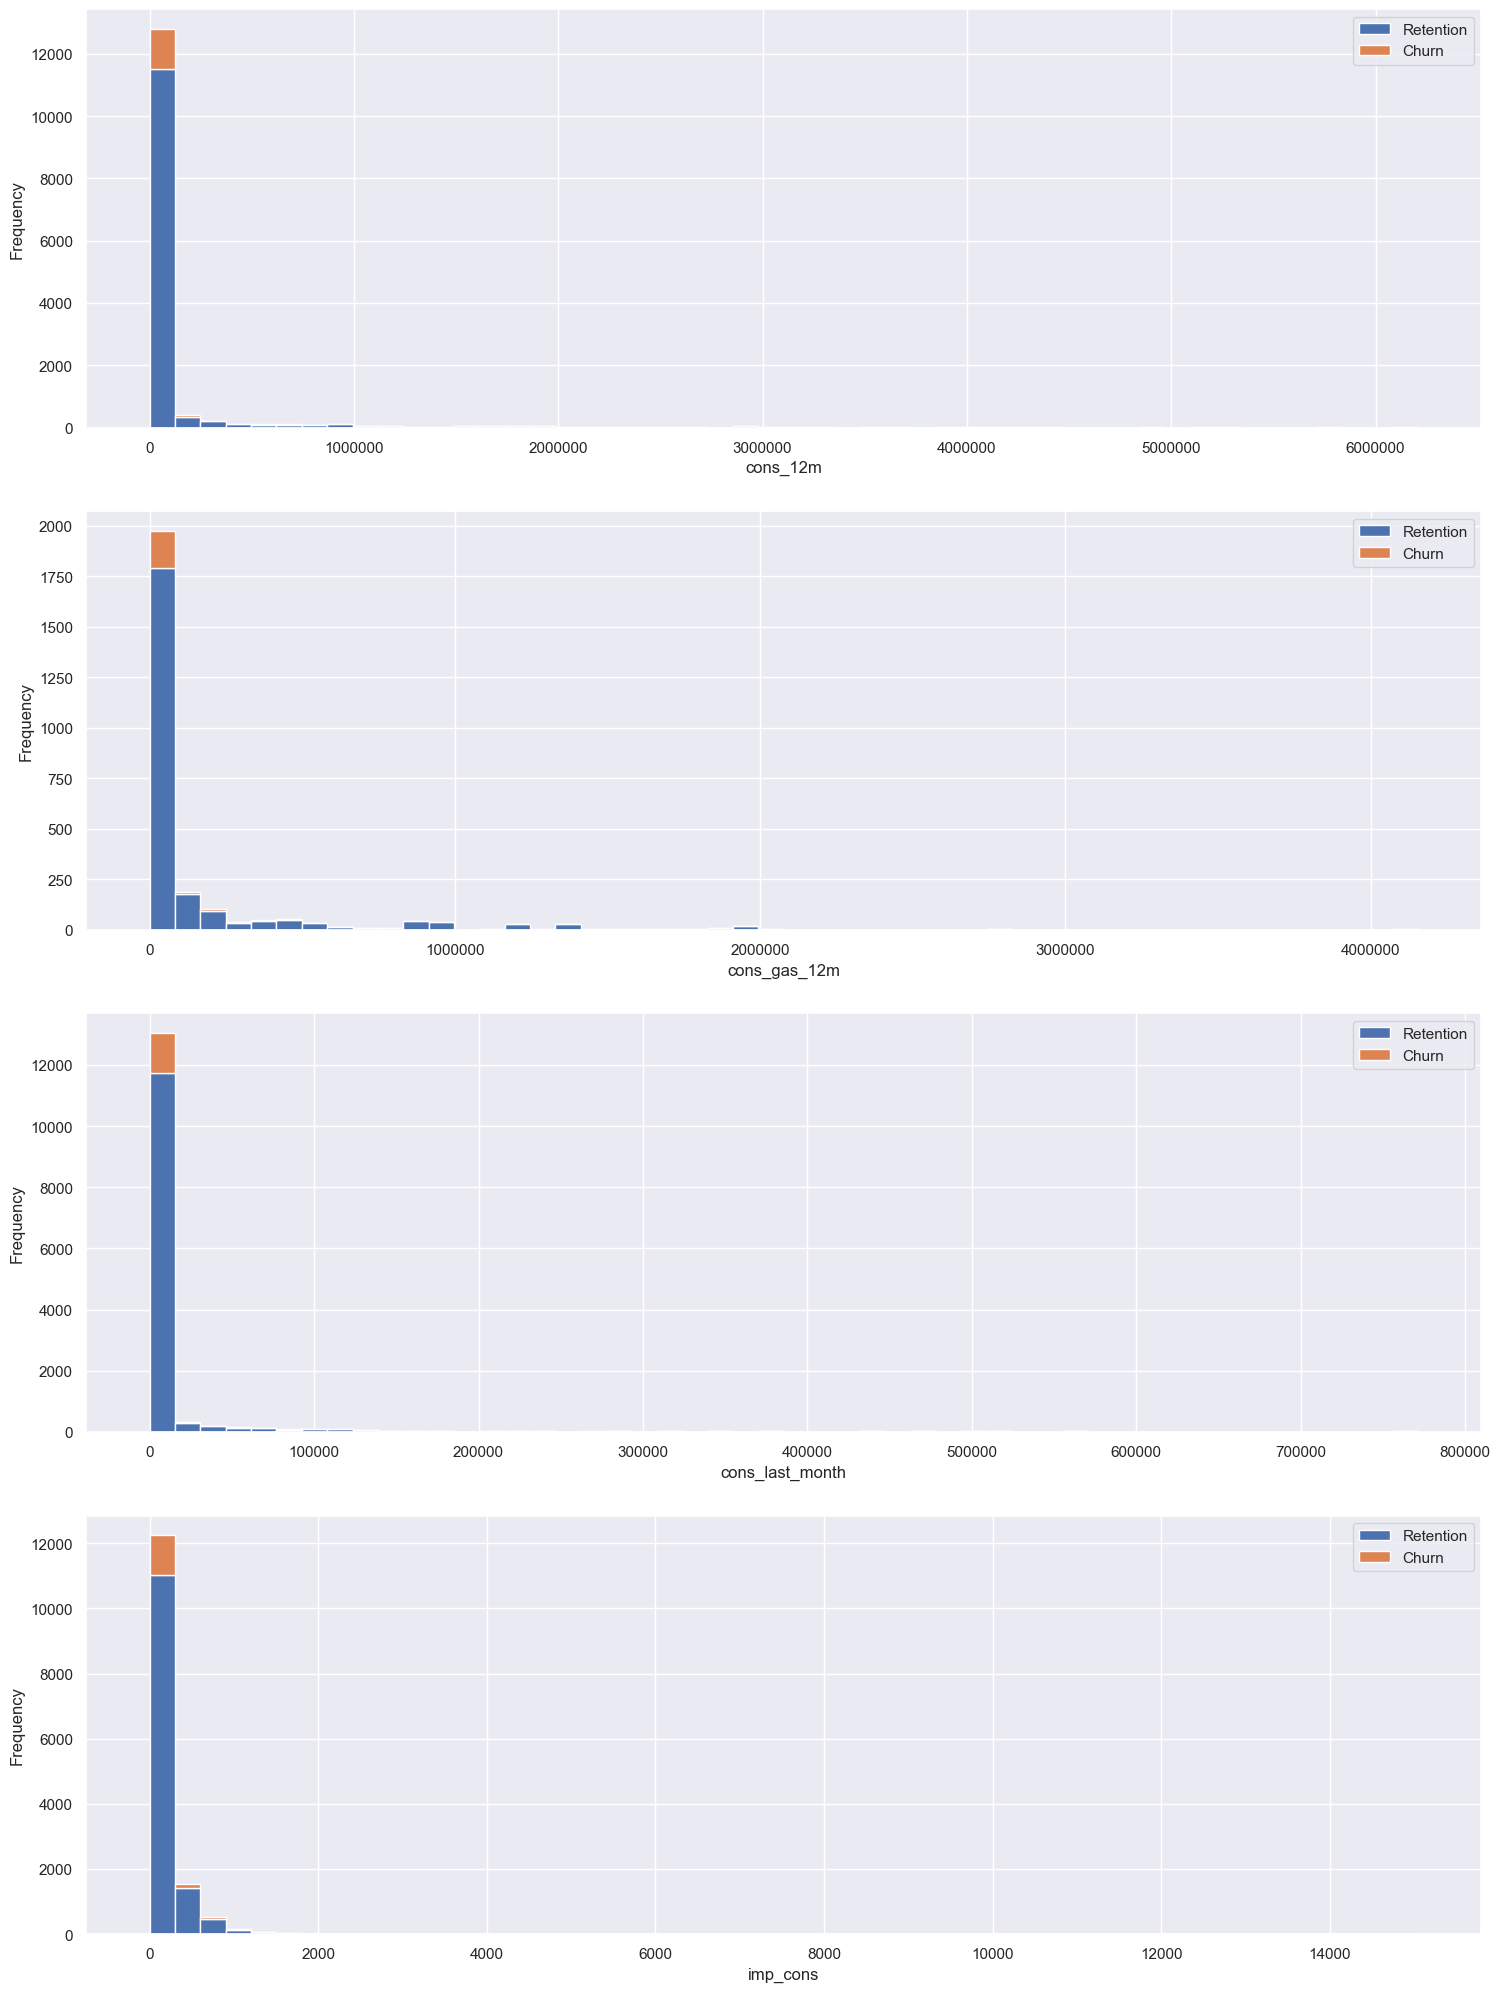

In [17]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

### Consumption Distribution Insights

We analyzed the distribution of customer energy consumption over various timeframes using stacked histograms split by churn status. These plots reveal key patterns and potential outliers:

- **`cons_12m`**: Annual consumption is highly positively skewed, with most customers consuming less than 100,000 units, but a few consuming over 2 million units. The skewness indicates a small group of heavy users.
  
- **`cons_gas_12m`**: For customers with gas service, the gas consumption also shows a positively skewed distribution. Most customers use relatively little gas, but a few outliers have much higher usage.

- **`cons_last_month`**: Last month’s consumption distribution mirrors the yearly pattern—highly right-skewed. Many customers consumed little to no electricity recently, which might indicate seasonal behavior or disconnection.

- **`imp_cons`**: The imputed consumption variable, potentially a derived or estimated value, is heavily concentrated around zero, suggesting it may serve as a flag or proxy for missing/incomplete data.

All four distributions exhibit long tails and high variance, suggesting the need for outlier treatment and possible log transformations during feature engineering to stabilize variance and improve model performance:contentReference[oaicite:0]{index=0}.


### Step 6: Visualize Outliers with Boxplots

To better understand the spread and detect potential outliers in consumption-related features,  
we use boxplots for four key variables. This helps guide decisions on data transformation and cleaning.


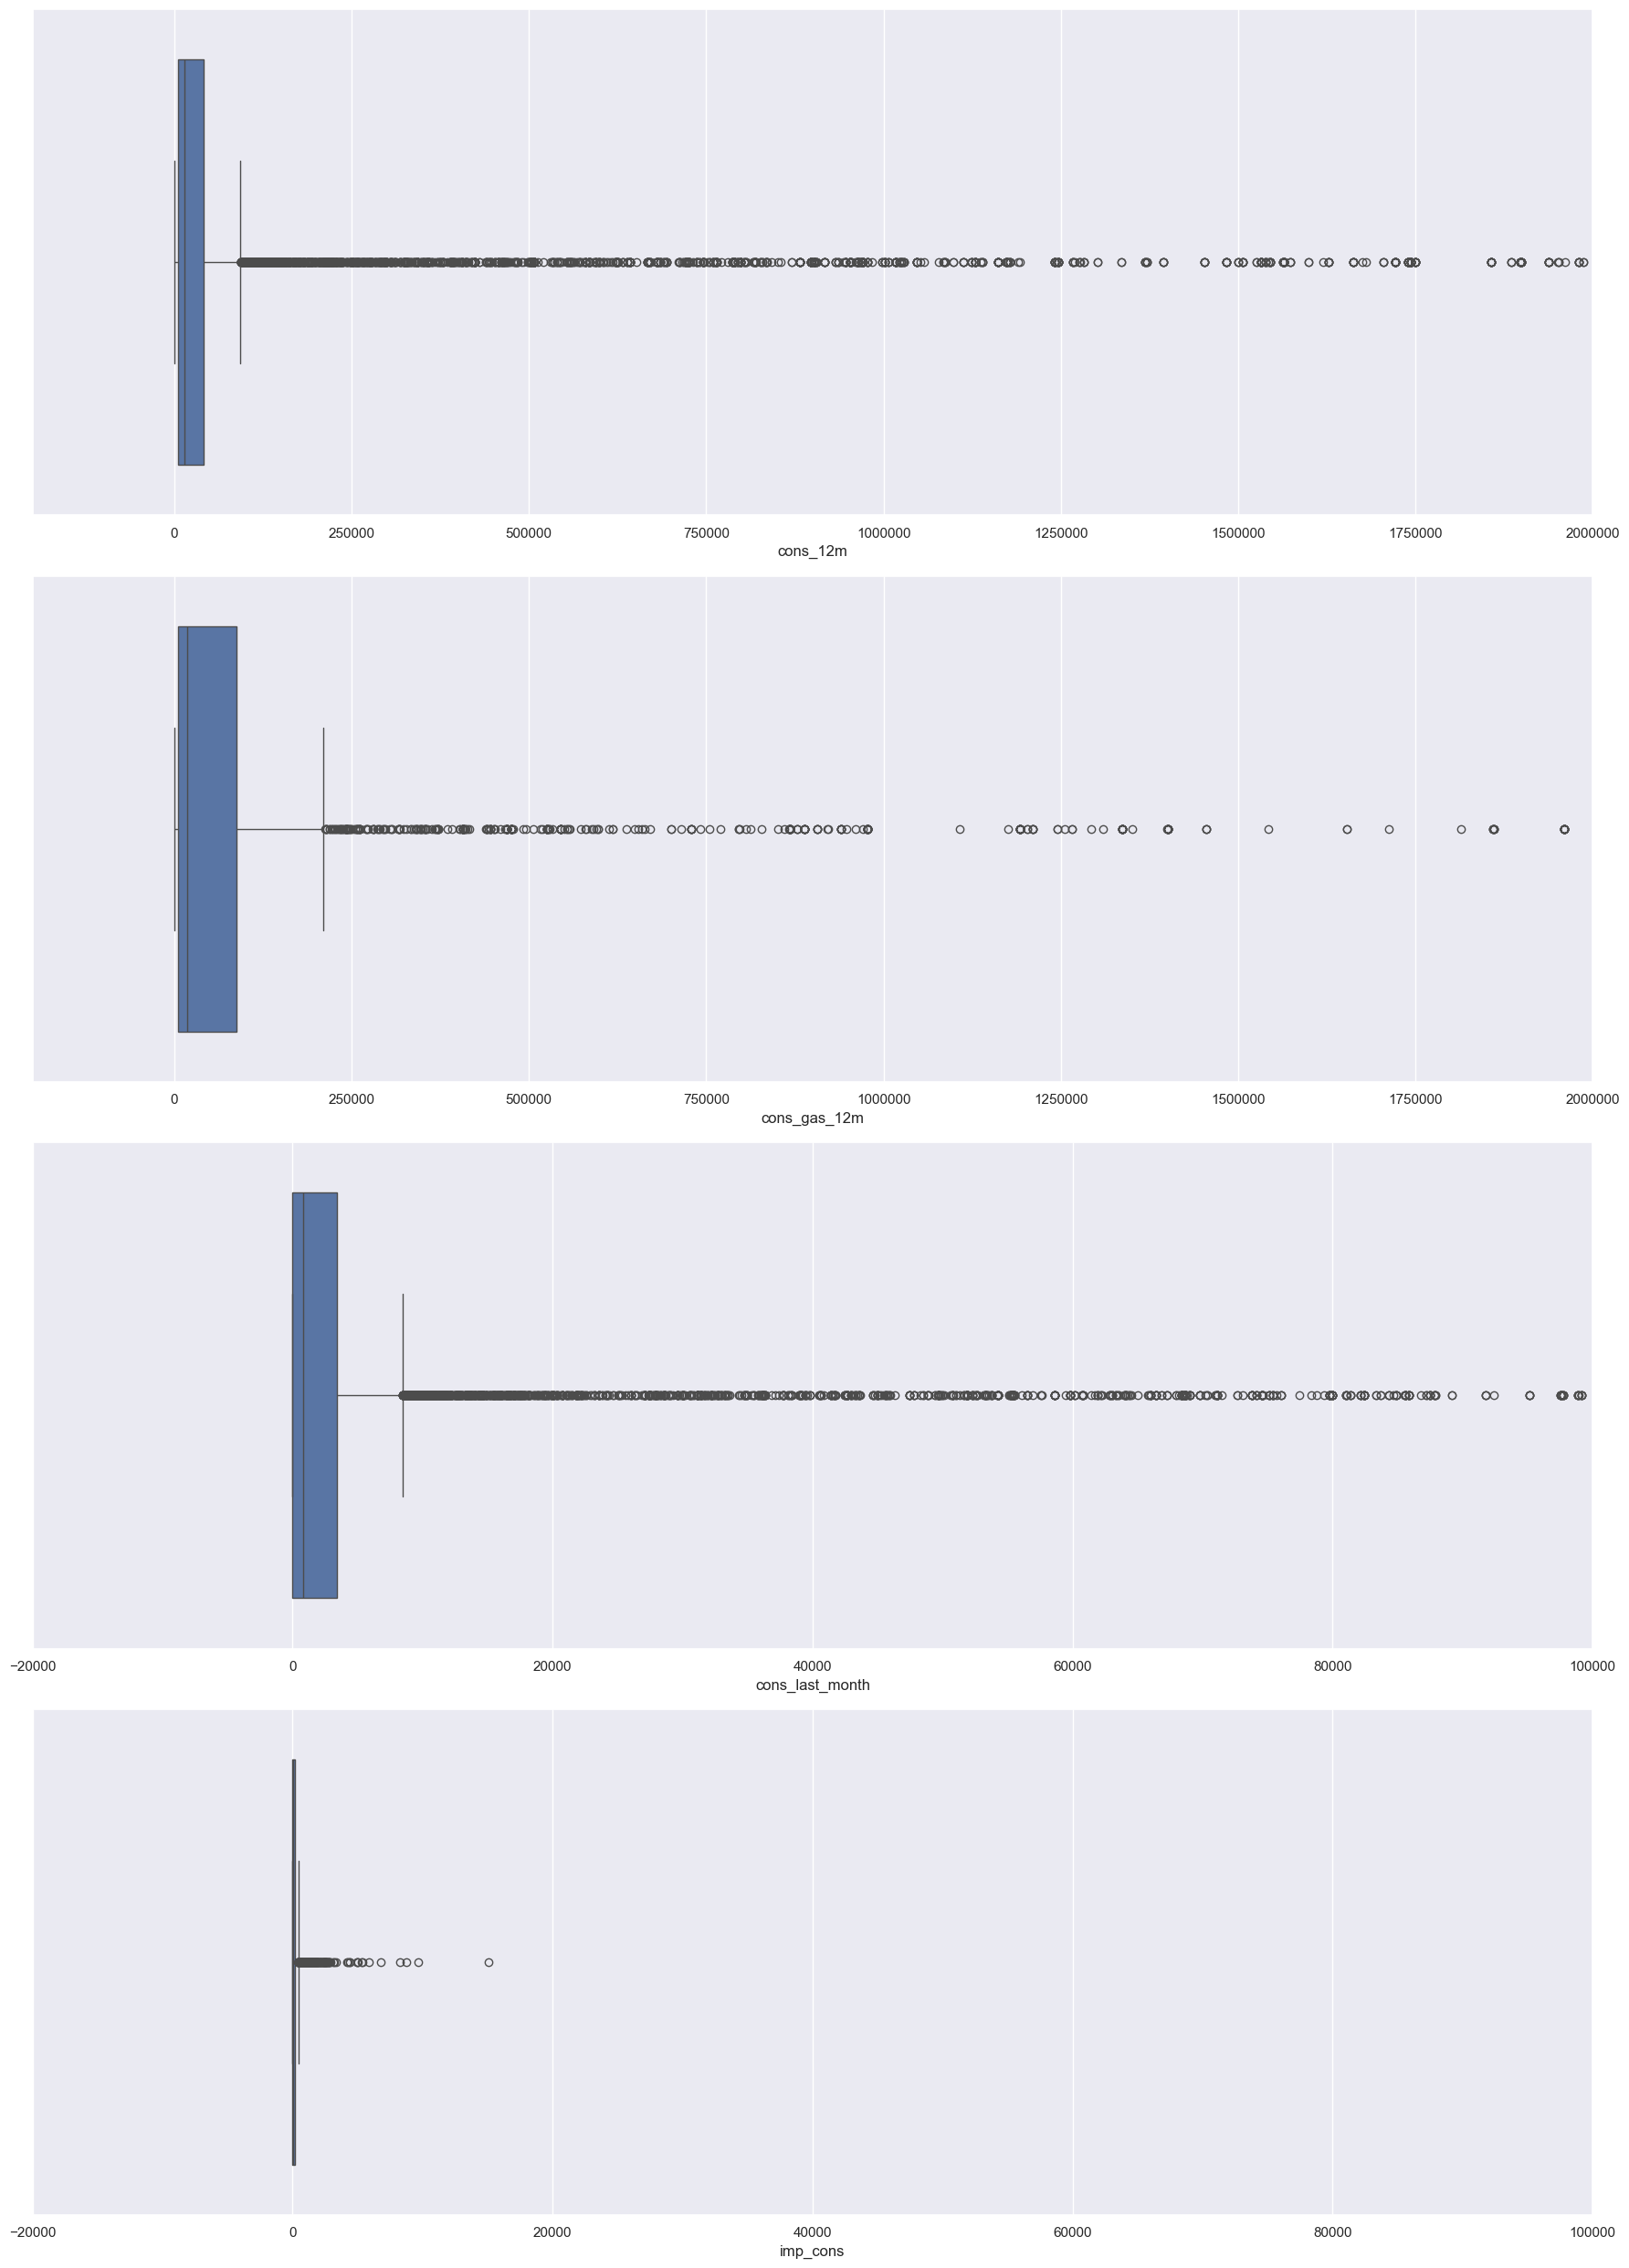

In [18]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])

# Set x-axis limit without using ticklabel_format
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
axs[3].set_xlim(-20000, 100000)  # Added missing limit for the fourth plot

# Alternative way to format ticks without scientific notation
for ax in axs:
    ax.get_xaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()  # Add spacing between subplots
plt.show()

### Boxplot Analysis of Consumption Features

We use boxplots to visualize the distribution and detect outliers in the key consumption-related features:

- **`cons_12m`**: The annual consumption is heavily right-skewed with a significant number of extreme outliers. This suggests a wide range in usage levels, with a small group of very high consumers.
  
- **`cons_gas_12m`**: For customers with gas service, the gas consumption also displays a long right tail. Most customers consume little gas, but some consume substantially more.

- **`cons_last_month`**: Last month's consumption also shows a right-skewed distribution. There are many customers with low or zero consumption, and a few with notably high values.

- **`imp_cons`**: The imputed consumption variable exhibits a similar pattern to the others, with many low values and several large outliers. This feature may reflect estimated consumption due to missing or incomplete meter data.

These distributions suggest the presence of extreme values, reinforcing the need for outlier handling and potential transformations in the preprocessing phase.


We will deal with skewness and outliers during feature engineering in the next exercise.


### Step 7: Forecast Variable Distribution

We now explore the distribution of forecast-related features to understand their variability across churned and retained customers.  
These variables include projected consumption, discounts, rent, and forecasted energy prices.  
Stacked histograms will help reveal any distinguishable patterns between the two groups.


In [19]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

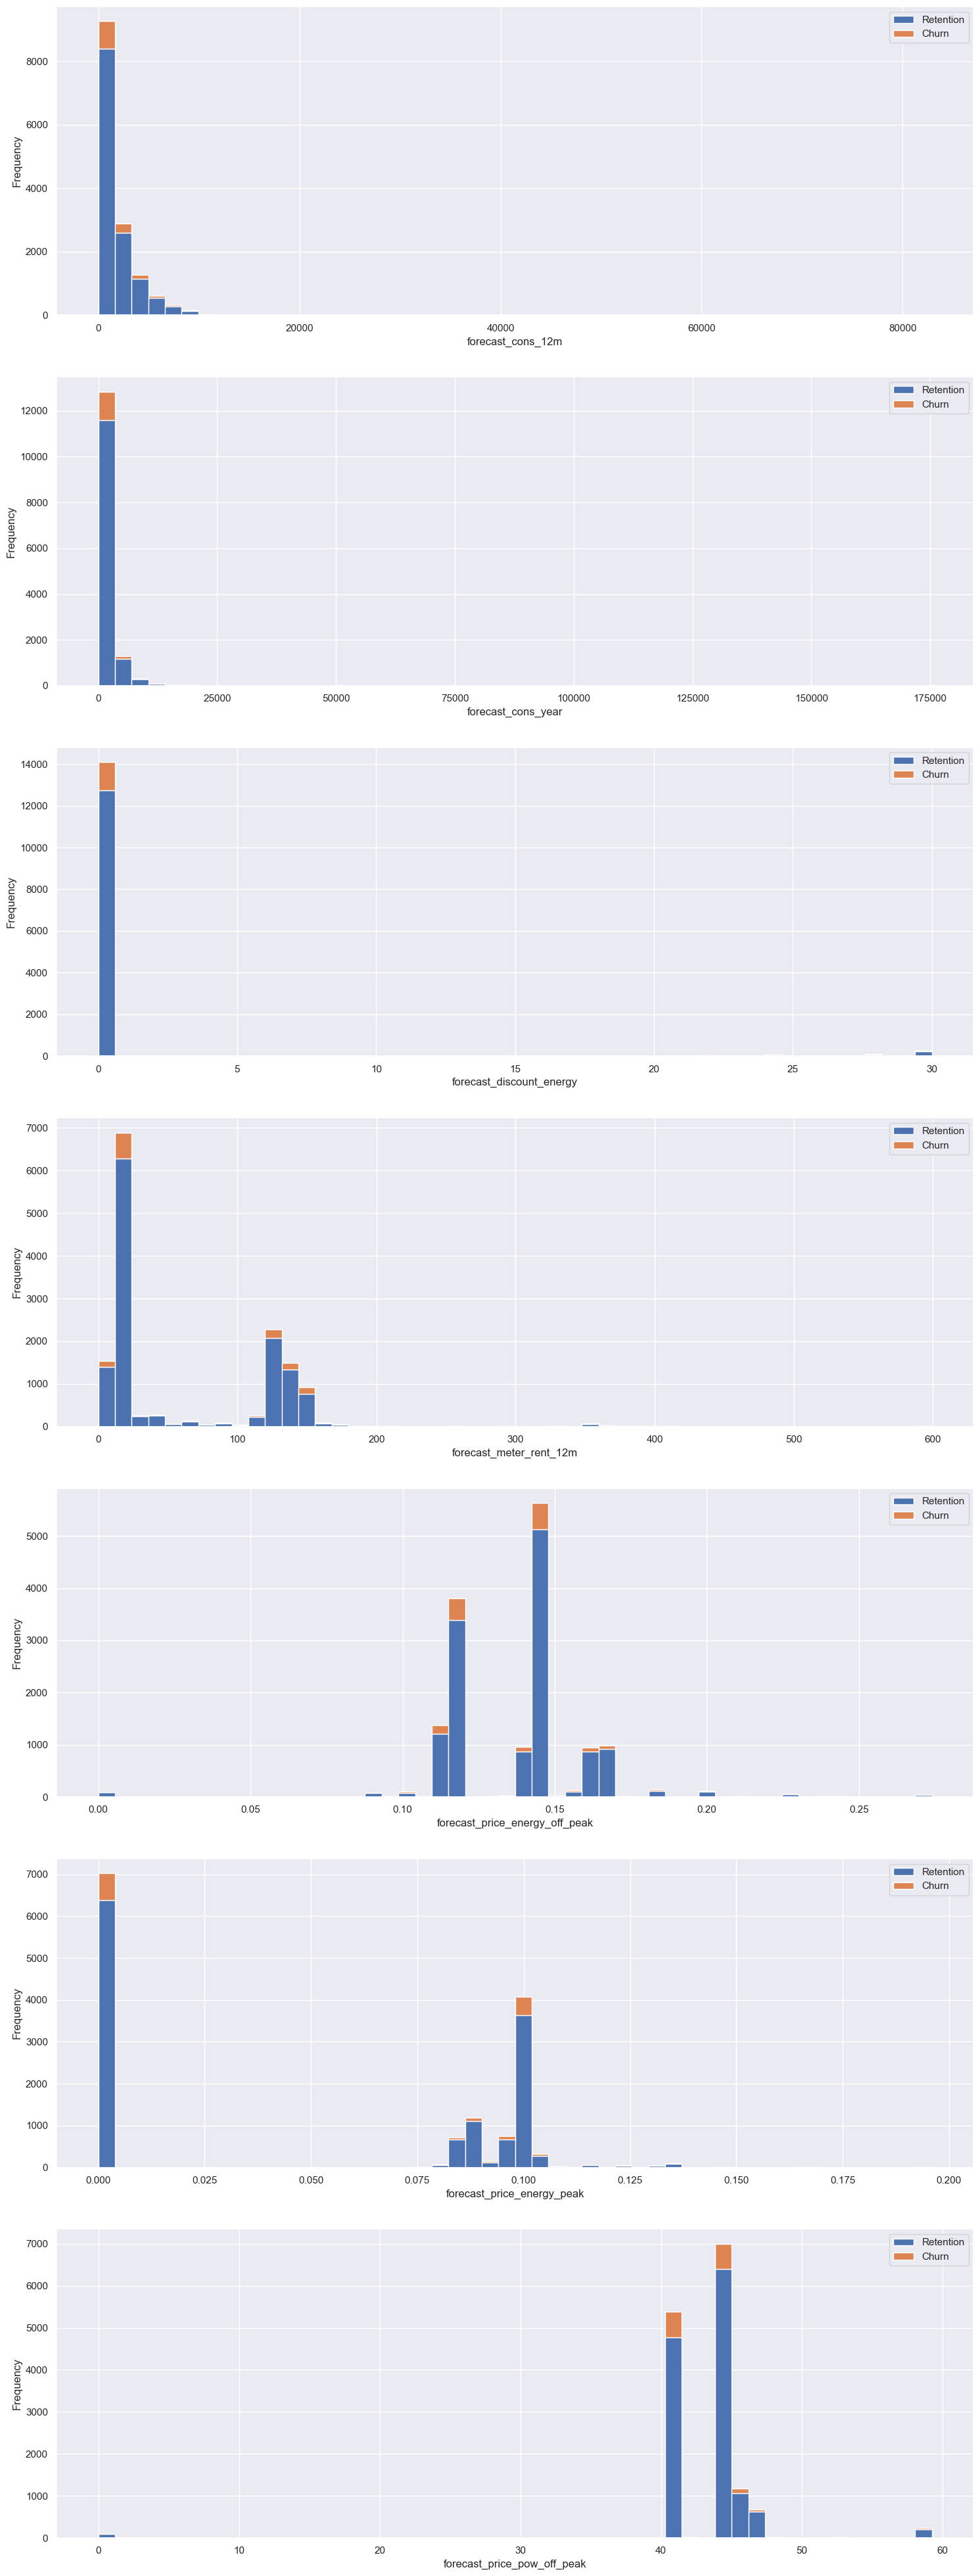

In [20]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

The forecast-related features show right-skewed distributions, with a large concentration of low values.  
Churned and retained customers follow similar patterns, but subtle differences in distribution height may indicate predictive potential.  
Further preprocessing may be required to normalize these variables.


### Churn by Gas Contract Type



In [21]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

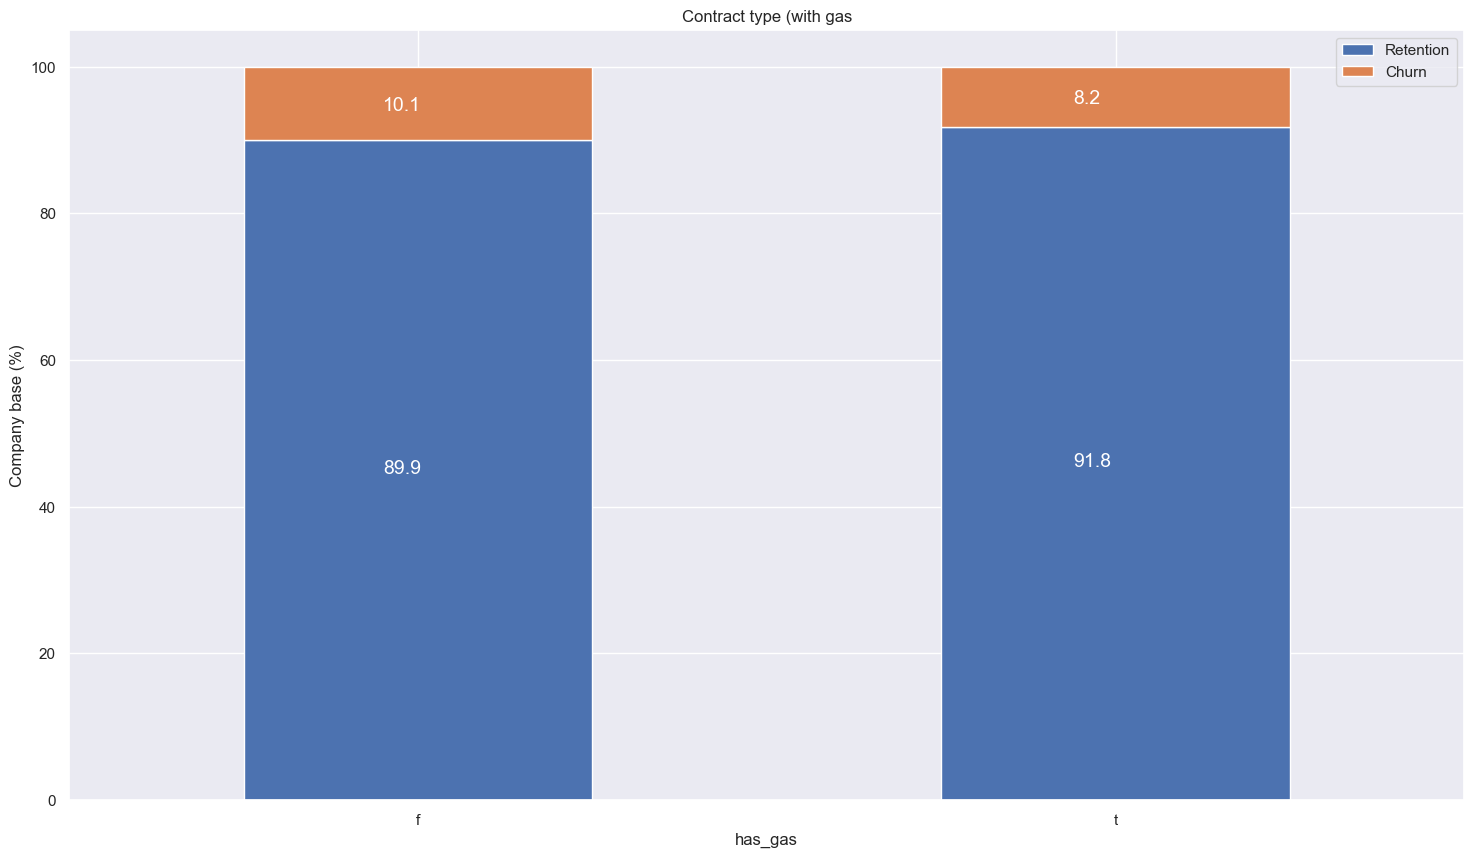

In [22]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

This visualization compares churn rates between customers with and without gas service.  
Customers with gas (`t`) have a slightly lower churn rate (8.2%) compared to those without gas (`f`, 10.1%), suggesting that bundling services may reduce churn.


### Step 8: Margin Feature Visualization

In this step, we examine the distribution and potential outliers of three margin-related features using boxplots:  
- `margin_gross_pow_ele`  
- `margin_net_pow_ele`  
- `net_margin`  

This helps us assess variability in profitability metrics across the customer base and informs potential transformations.


In [23]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

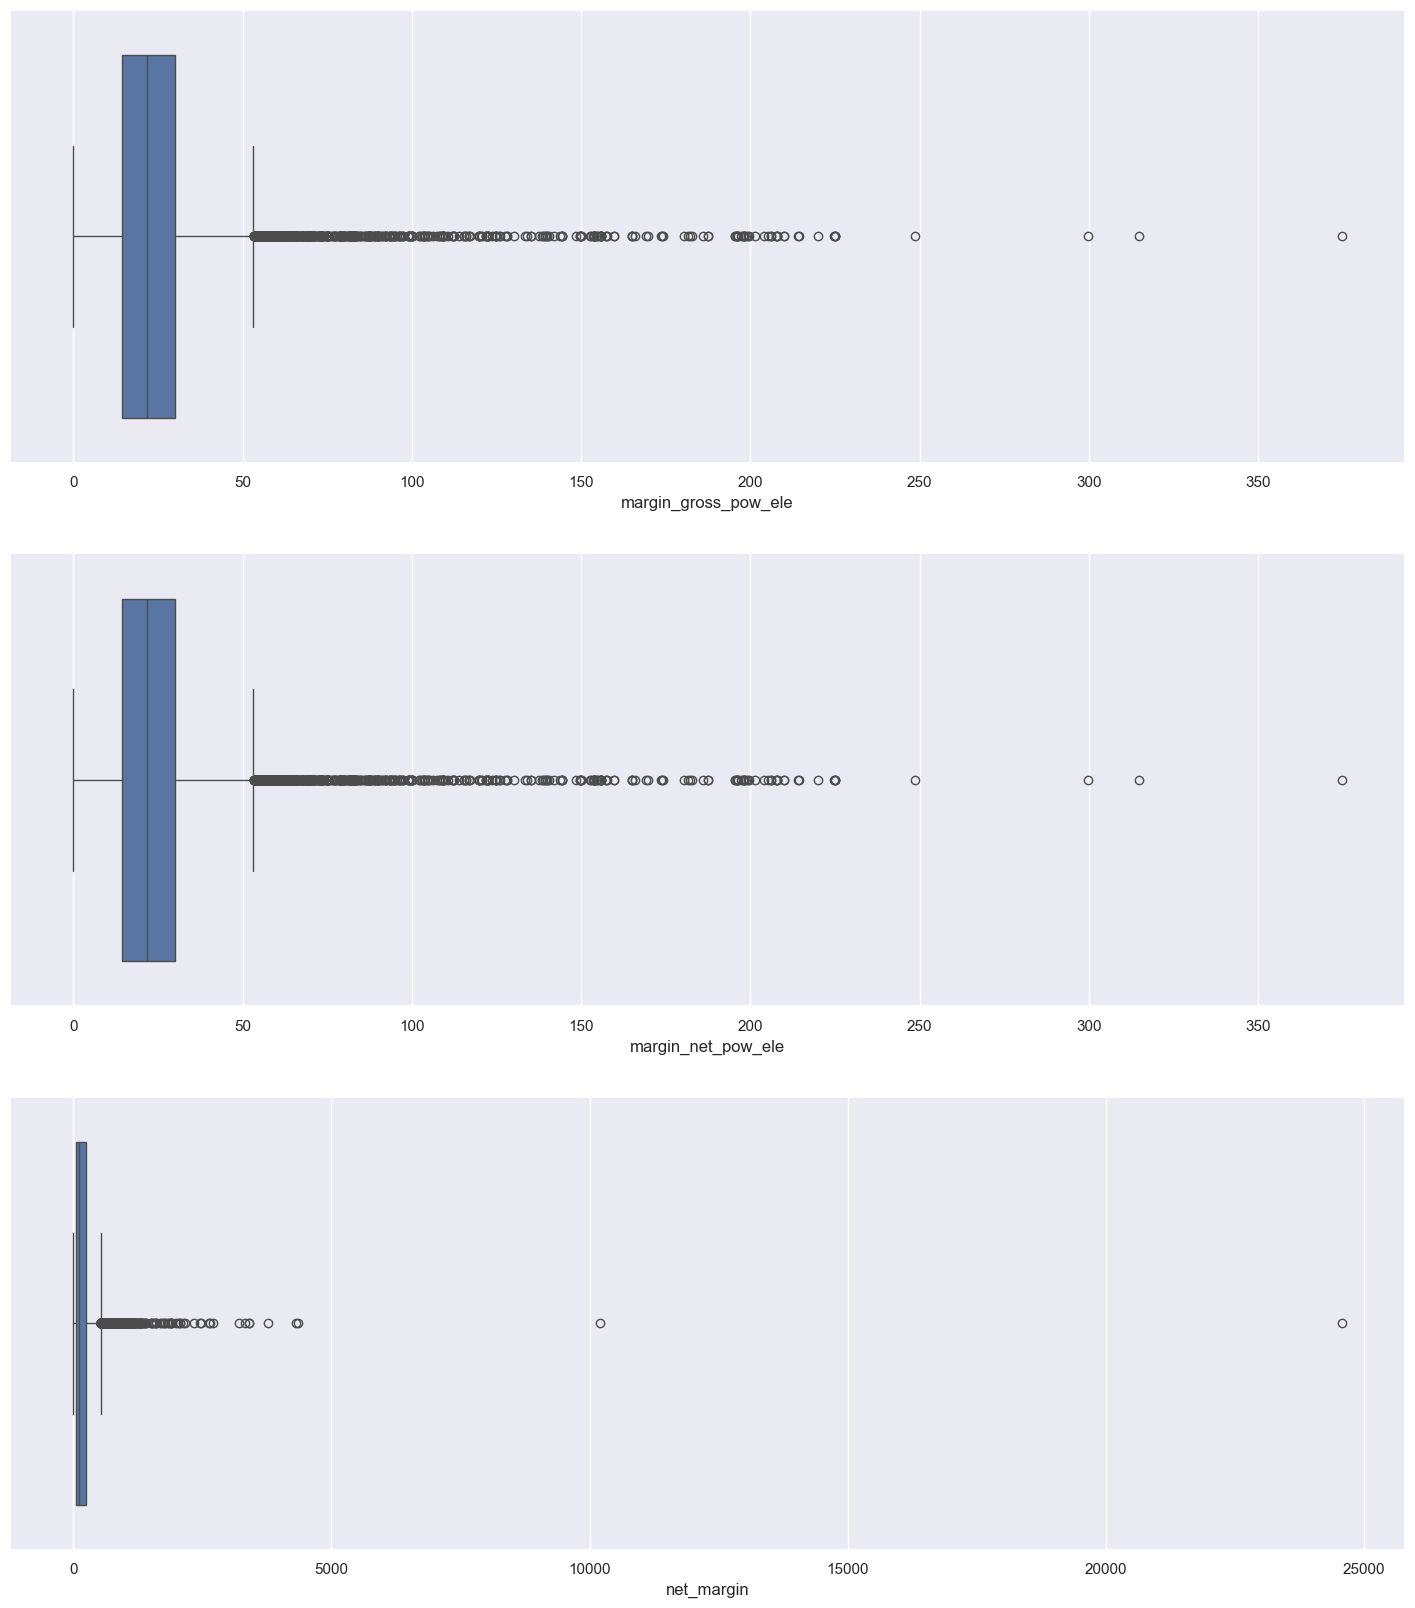

In [24]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

# Plot boxplots
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=margin["margin_net_pow_ele"], ax=axs[1])
sns.boxplot(x=margin["net_margin"], ax=axs[2])

# Alternative way to remove scientific notation
from matplotlib.ticker import ScalarFormatter

# Apply ScalarFormatter to each axis
for ax in axs:
    formatter = ScalarFormatter(useOffset=False)
    ax.xaxis.set_major_formatter(formatter)

plt.show()

The boxplots reveal that all three margin-related features are highly skewed with numerous outliers.  
Most values are clustered near zero, but extreme values exist in both directions, especially for `net_margin`. These distributions suggest that normalization or clipping may be necessary before modeling.



In [25]:
power = client_df[['id', 'pow_max', 'churn']]

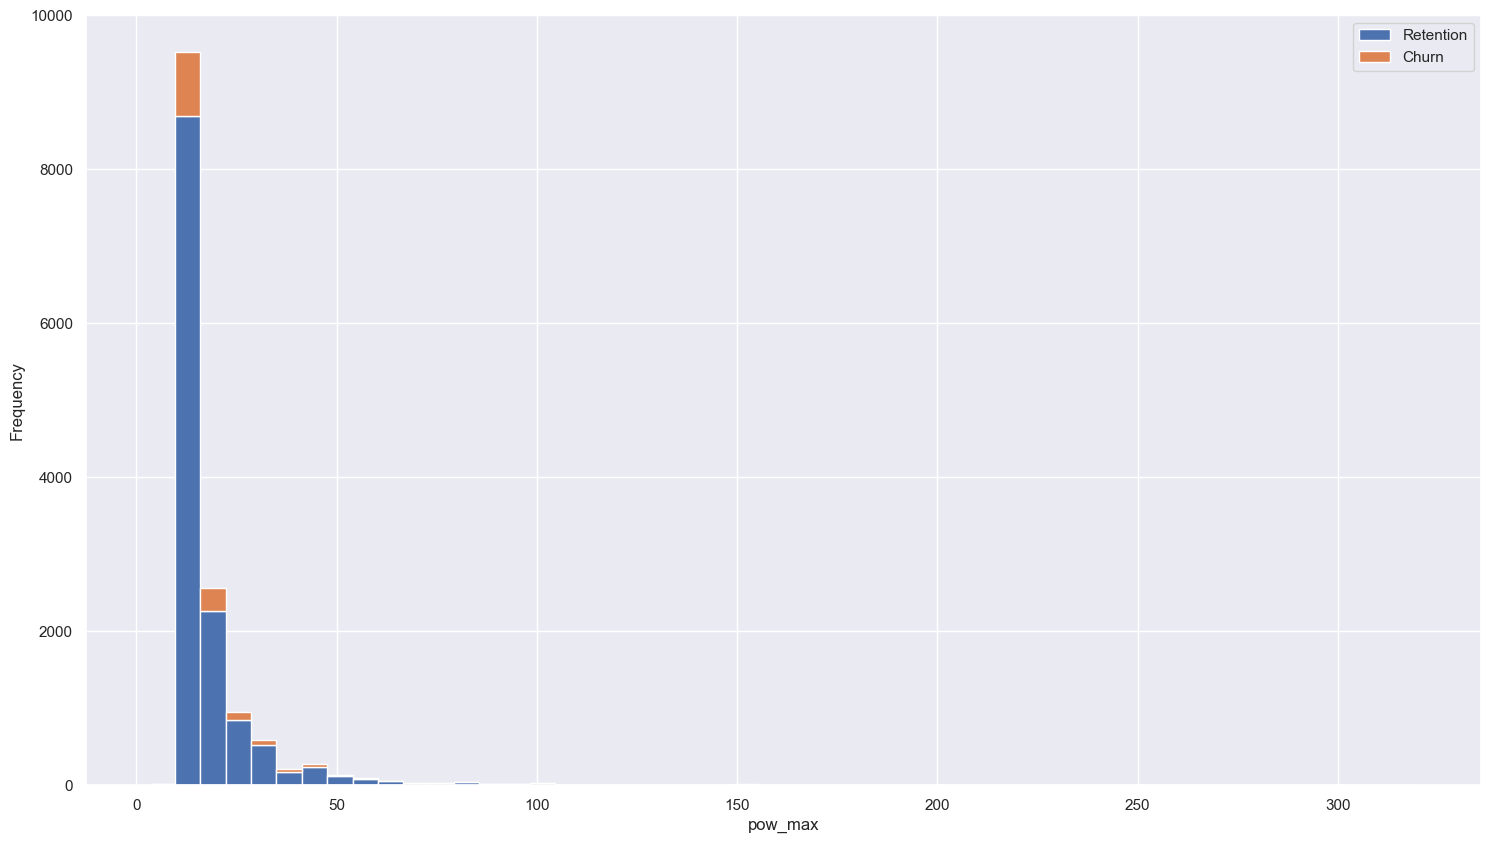

In [26]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Power Consumption Maximum

The `pow_max` variable shows a steeply right-skewed distribution, with the majority of customers clustered at low values.  
Churned customers are distributed similarly to retained ones, though a few churners appear in higher consumption ranges.  
This feature may benefit from scaling or transformation during preprocessing.


### Step 9: Product Engagement Analysis

Here, we analyze churn distribution by the number of products (`nb_prod_act`) a customer holds.  
This helps assess whether product bundling is associated with higher retention rates.


In [27]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

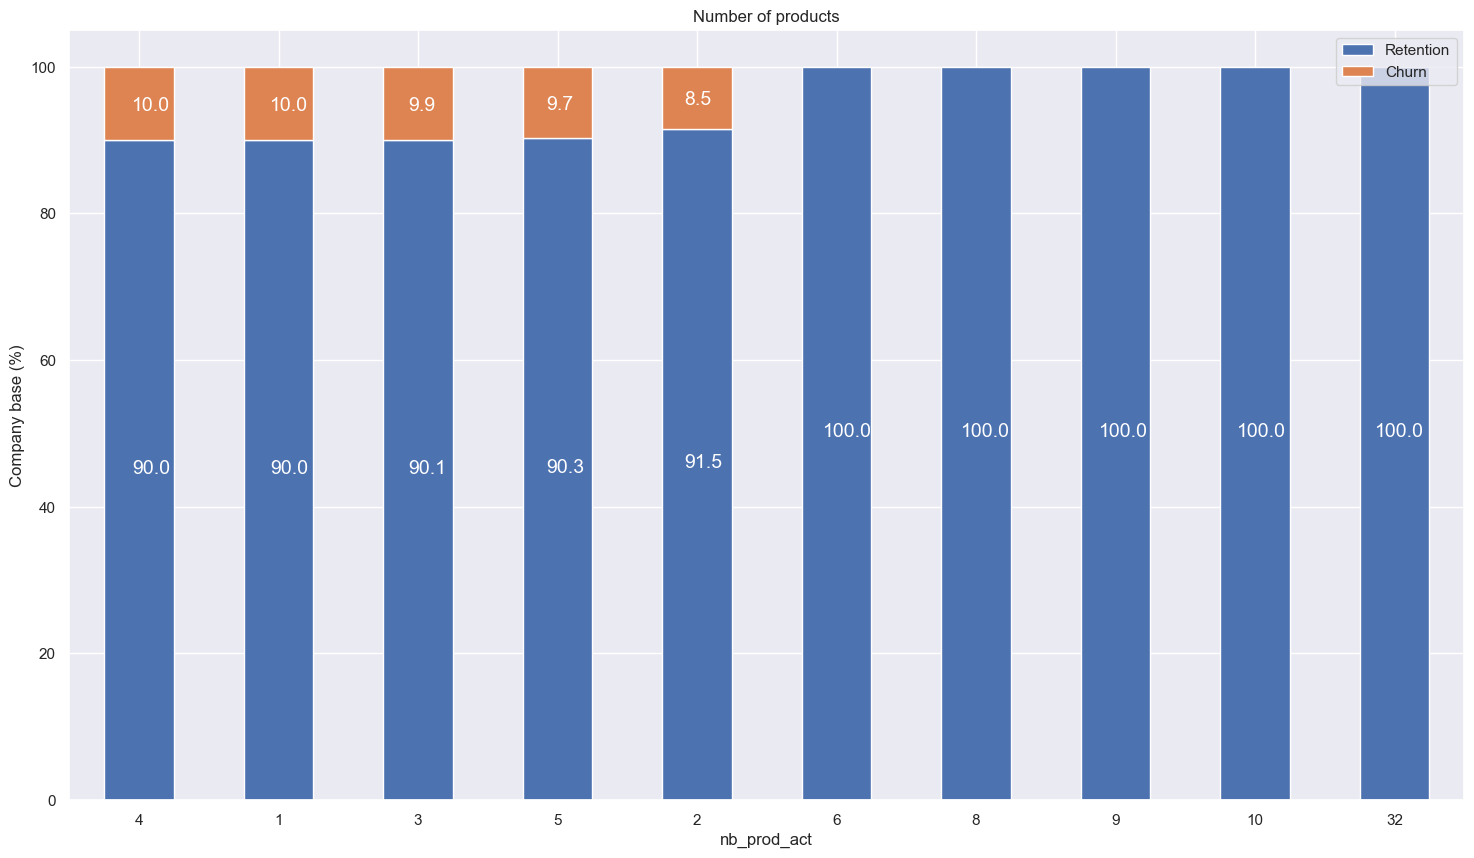

In [28]:
plot_stacked_bars(products_percentage, "Number of products")

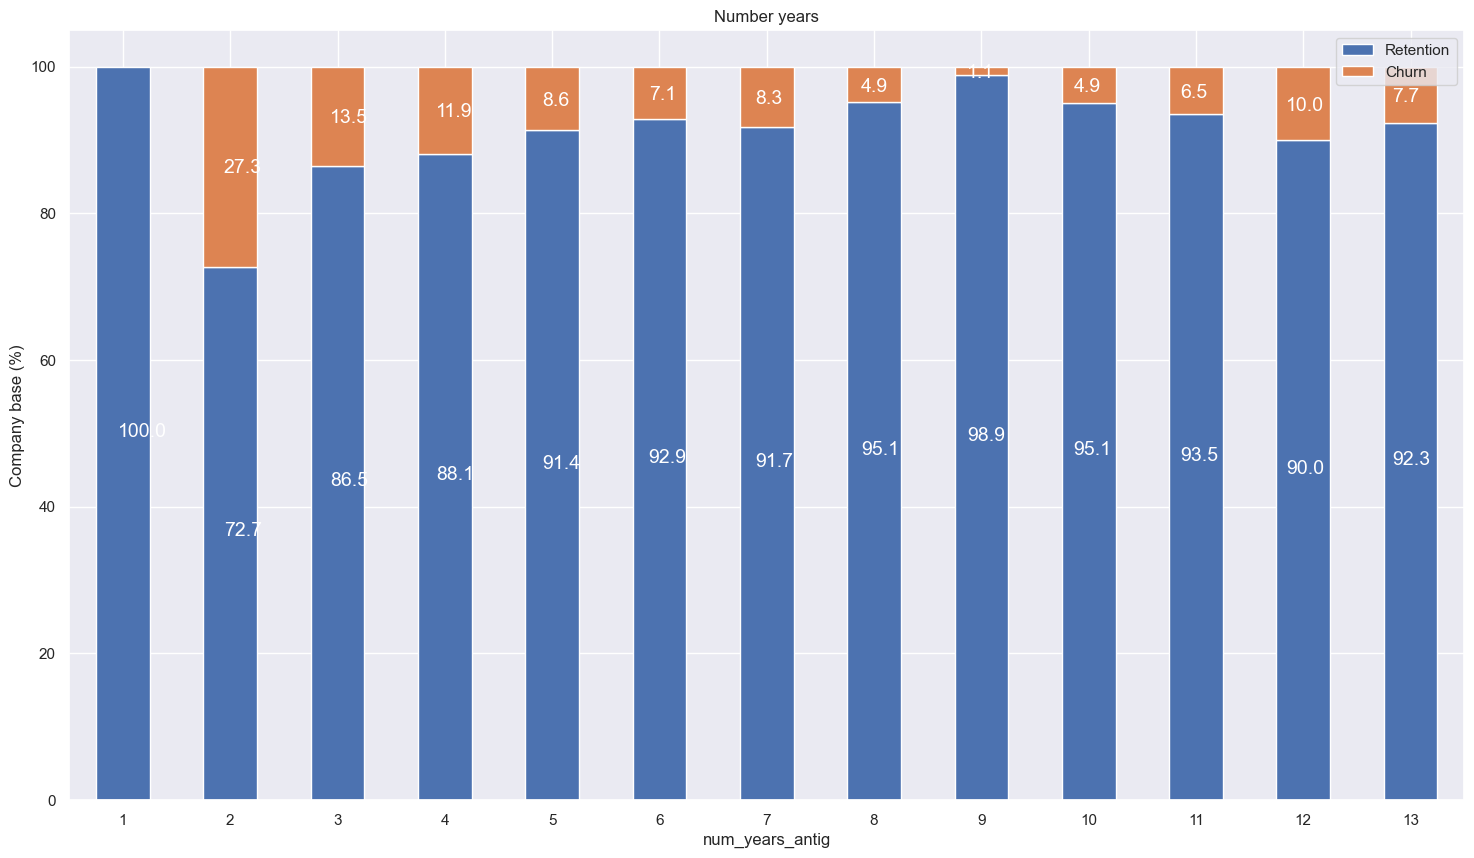

In [29]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

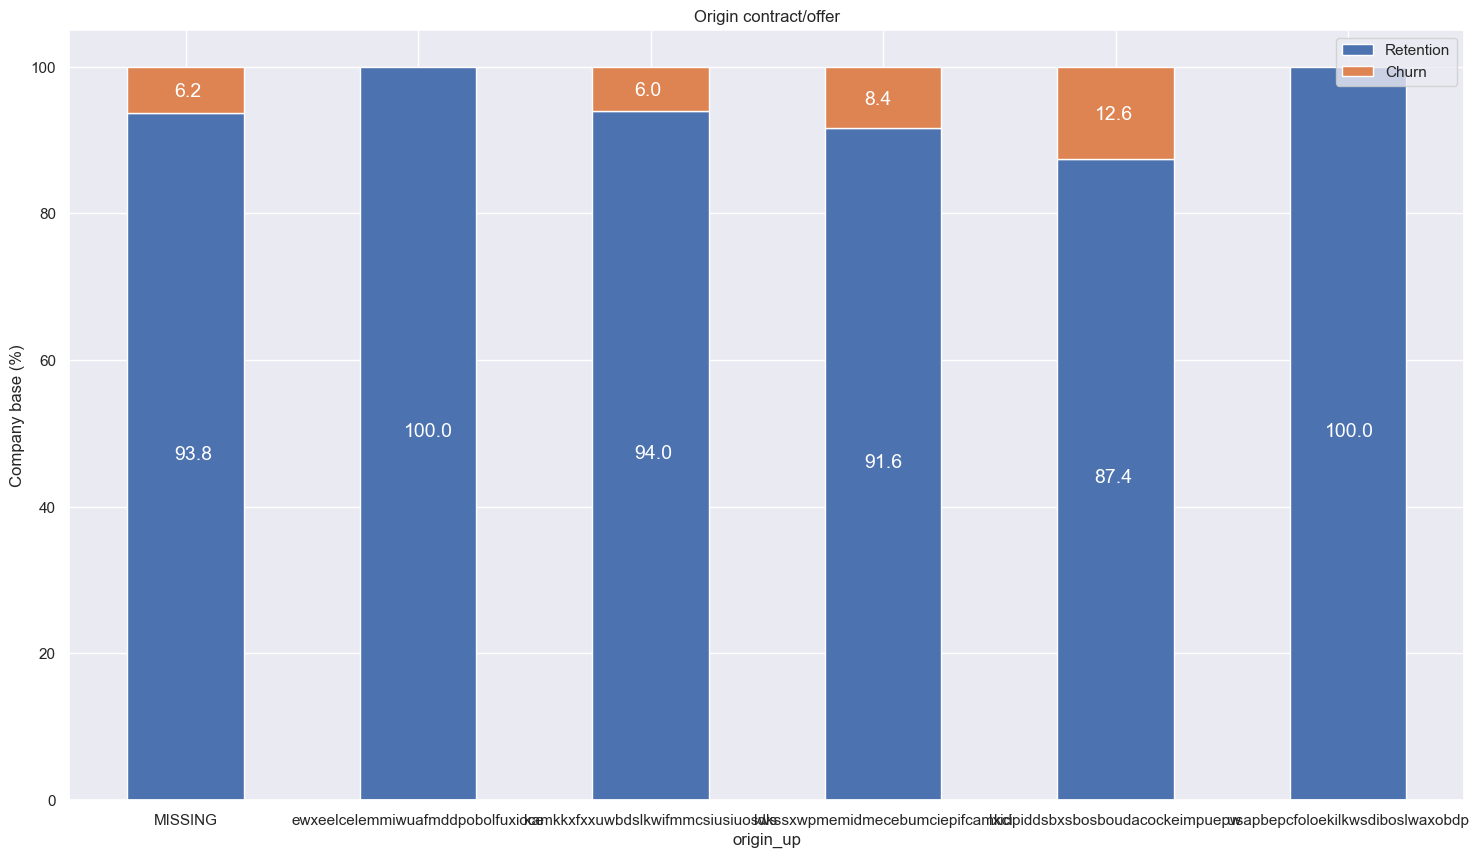

In [30]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

The plots show that customers with fewer active products tend to have higher churn rates.  
As the number of products increases, the churn percentage generally decreases, suggesting that product bundling may improve customer retention.  
This makes `nb_prod_act` a potentially valuable feature for predicting churn.


## Task 3 – Feature Engineering and Modeling

### Objective

In this task, we aim to improve our churn prediction performance by engineering additional features.  
Specifically, we will construct a new variable that captures **price volatility across selected months** and integrate it into our dataset to evaluate its predictive value.



## 1. Import packages

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## 2. Load data

In [33]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [34]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

### 3. Feature Engineering

#### Capturing Price Volatility Between Key Months

We generate a new feature that measures the change in off-peak electricity prices between December and the preceding January.  
This engineered variable helps capture seasonal pricing trends, which may influence customer churn behavior.


In [35]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

This code calculates the change in off-peak prices between January and December for each customer.  

- It first computes the monthly average off-peak variable and fixed prices per customer.
- Then it isolates the January and December prices.
- Finally, it merges the data and computes the difference between December and January prices for both energy (`offpeak_diff_dec_january_energy`) and power (`offpeak_diff_dec_january_power`), resulting in two engineered features for modeling.


In [36]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

We merge the newly engineered features back into the main dataset using the `id` column.  
This results in an updated DataFrame (`df`) with 46 columns, now including the price volatility features for downstream modeling.


In [37]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   
2               0.000000                   0.000000               0.000004   
3               0.000000                   0.000000               0.000003   
4               0.000000                   0.000000               0.000011   

   var_6m_price_peak var_6m_price_mid_peak  churn  \
0       9.953056e+01          4.423670e+01      1   
1       1.217891e-03          0.000000e+00      0   
2       9.450150e-08          0.000000e+00      0   
3       0.000000e+00          0.000000e+00      0   
4       2.896760e-06          4.860000e-10      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 46 columns]

### Step 10: Calculate Average Price Differences Across Price Types

To further enrich our dataset, we engineer new features that capture the average price differences between multiple tariff categories (off-peak, peak, and mid-peak) across both variable and fixed rates.  
These derived features aim to reflect pricing patterns that could influence churn decisions.


In [38]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [39]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [40]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_mid_peak  \
0      2015-11-01   2015-06-23               0.00  ...           4.423670e+01   
1      2009-08-21   2015-08-31             189.95  ...           0.000000e+00   
2      2010-04-16   2015-04-17              47.96  ...           0.000000e+00   
3      2010-03-30   2015-03-31             240.04  ...           0.000000e+00   
4      2010-01-13   2015-03-09             445.75  ...           4.860000e-10   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 52 columns]

This engineered feature provides additional detail compared to the earlier year-based feature.  
Instead of tracking price changes over a full year, it captures average differences between pricing periods—  
specifically `off_peak`, `peak`, and `mid_peak`. While the December-to-January metric highlights broader seasonal shifts,  
these new features aim to uncover more localized, short-term pricing patterns that may also impact customer churn.


### Step 11: Capture Maximum Price Volatility Over Time

To enhance our feature set further, we calculate the maximum monthly differences in prices across key periods—  
specifically between `off_peak`, `peak`, and `mid_peak` rates for both variable and fixed pricing.  
This allows us to capture sharp price fluctuations at any point during the year,  
which may help identify customers more sensitive to sudden changes in their energy costs.


In [41]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [42]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [43]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [44]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 58 columns]

I decided to engineer a feature based on the maximum monthly price change because I considered the customer experience. From the perspective of a PowerCo client, sudden price spikes could easily trigger dissatisfaction or a switch to competitors. Capturing the largest fluctuations across months provides a more granular way to identify potential churn signals. Given our goal of predicting churn, this seemed like a valuable feature to include in the model.


### Feature Engineering on Customer Tenure

In this step, we create a new feature called `tenure`, which measures the duration (in years) that a customer has been with the company. By calculating the difference between `date_end` and `date_activ`, we estimate how long each customer has been active. 

We then analyze the average churn rate across different tenure values. The results suggest that customers with a tenure of 4 months or less are significantly more likely to churn. This highlights tenure as a potentially powerful predictive feature for modeling churn, especially in distinguishing newer customers from long-term ones.


In [45]:
# Convert to days first, then divide by 365.25 to get approximate years
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'D')).astype(float) / 365.25
# If you need integers, round or convert
df['tenure'] = df['tenure'].astype(int)

In [46]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143713
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

The churn analysis based on customer tenure shows that clients with shorter engagement periods (particularly 4 months or less) are significantly more likely to churn. A notable drop in churn occurs after the 4-month mark, suggesting that early engagement is critical for retention. This highlights tenure as an important feature, as it may serve as a proxy for customer loyalty and stability. Modeling this could improve our ability to identify at-risk customers.


### Step 12: Convert Contract Dates into Relative Month Features

In this step, we transform several date-related columns into numerical features representing the number of months relative to a fixed reference point (January 2016). This allows us to quantify important temporal aspects of customer behavior, such as:

- `months_activ`: how long a customer has been active,
- `months_to_end`: how much time is left on their contract,
- `months_modif_prod`: time since the last product modification, and
- `months_renewal`: time since their last renewal.

These engineered time-based features may help capture recency effects, contract cycles, and behavioral triggers related to churn.


In [47]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [48]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Define a function to convert dates to months
def convert_months(reference_date, df, date_column):
    # Calculate the difference in days first
    days_diff = (df[date_column] - reference_date).dt.days
    # Convert days to months (approximate)
    months_diff = days_diff / 30.44  # Average days in a month
    return months_diff

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Dates in their raw form are not useful for modeling, so we engineered four time-based features to capture potential churn behavior. 

- `months_activ` may reflect loyalty, as longer-tenured clients might be more stable.
- `months_to_end` could indicate churn risk, as customers nearing contract expiration may explore other options.
- `months_modif_prod` suggests engagement—recent updates may signal satisfaction or responsiveness.
- `months_renewal` captures commitment, as recent renewals may reflect trust in the service.

Together, these features quantify customer lifecycle stages and engagement, potentially improving churn prediction.


In [49]:
# Drop the original datetime columns now that their transformed versions have been created
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.145711  ...                            0.085483   
2                        0.165794  ...                            0.089162   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                                44.26693   
1                            0.000000                                44.44471   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3    -30.551905      -5.453351          -2.003942      -6.307490  
1       7    -76.346912      -7.950066         -76.346912      -4.040736  
2       6    -68.528252      -3.482260         -68.528252      -8.508541  
3       6    -69.086728      -2.923784         -69.086728      -9.067017  
4       6    -71.583443      -2.168200         -71.583443      -9.789750  

[5 rows x 59 columns]

### Step 13: Convert Boolean Column to Numeric

The `has_gas` column contains Boolean-like string values ('t' and 'f'). To make it suitable for modeling, we convert it into a binary numeric format where `'t'` becomes 1 and `'f'` becomes 0.


In [50]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

Customers who also purchase gas from PowerCo are likely more engaged and loyal, as they use multiple services. The churn rate for these customers is about 2% lower compared to those who do not buy gas, making `has_gas` a potentially valuable feature for predicting churn.


### Transforming Categorical Data

Machine learning models require numerical inputs, so categorical features such as strings must be converted into numeric format. One common approach is to use one-hot encoding, which creates a binary column for each category, indicating its presence with 1 and absence with 0.

Although label encoding (assigning integers to categories) is an alternative, it may introduce unintended ordinal relationships. Therefore, one-hot encoding is preferred for nominal categories like `channel_sales`, where no natural order exists.




In [51]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

We observed 8 unique categories in the `channel_sales` column, which would typically result in 8 dummy variables. However, the last 3 categories appear very infrequently—with only 11, 3, and 2 entries out of roughly 14,000 total rows. Because these values are so rare, the corresponding dummy variables would mostly contain zeros, offering little to no predictive value. To avoid adding noise or unnecessary complexity, we will exclude these rare categories from the final model.


## channel_sales

In [52]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3    -30.551905      -5.453351   
1                    0.000000  ...       7    -76.346912      -7.950066   
2                    0.087899  ...       6    -68.528252      -3.482260   
3                    0.000000  ...       6    -69.086728      -2.923784   
4                    0.100015  ...       6    -71.583443      -2.168200   

   months_modif_prod  months_renewal  channel_MISSING  \
0          -2.003942       -6.307490            False   
1         -76.346912       -4.040736             True   
2         -68.528252       -8.508541            False   
3         -69.086728       -9.067017            False   
4         -71.583443       -9.789750             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 63 columns]

### origin_up

In [53]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Just like with `channel_sales`, the final 3 categories in this column appear very infrequently. Since they contribute minimal information and would mostly consist of zeros in the dummy variables, we will exclude them from the features after encoding.


In [54]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...          -2.003942       -6.307490   
1                    0.000000  ...         -76.346912       -4.040736   
2                    0.087899  ...         -68.528252       -8.508541   
3                    0.000000  ...         -69.086728       -9.067017   
4                    0.100015  ...         -71.583443       -9.789750   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 65 columns]

### Transforming Numerical Data

Some features in our dataset are highly skewed, which can affect the performance of parametric models that assume normal distributions. To address this, we will apply a logarithmic transformation to positively skewed features.

Since log cannot be applied to zero, we will add 1 to each value before transforming. We'll begin by reviewing the summary statistics to compare distributions before and after transformation.


In [55]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [56]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [57]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

We observe that most features now have a lower standard deviation after the log transformation, indicating improved stability and reduced variability. 

Next, we'll visualize the distributions of a few transformed features to confirm the effect.



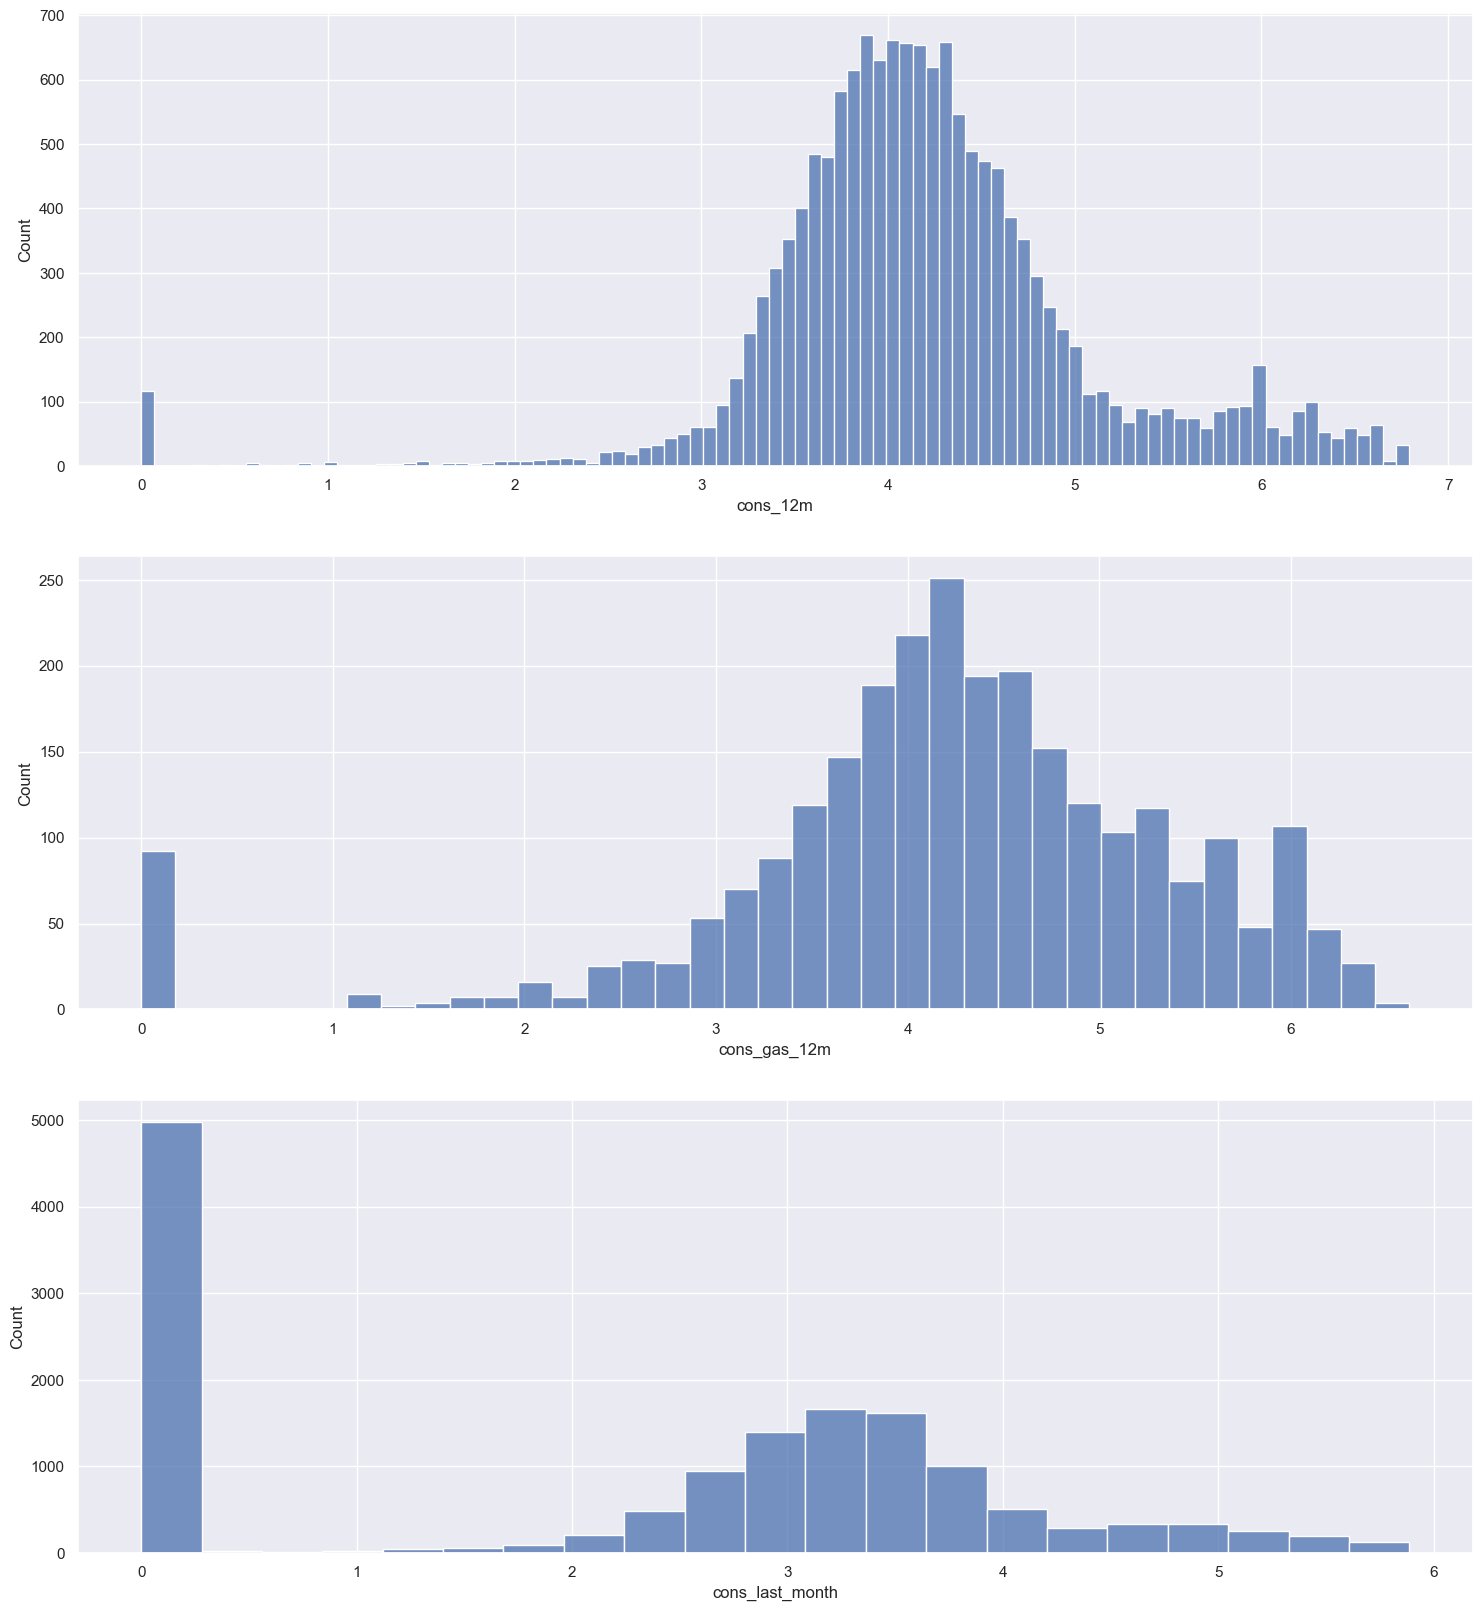

In [58]:
import seaborn as sns
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot histograms
sns.histplot(data=df["cons_12m"].dropna(), ax=axs[0])
sns.histplot(data=df[df["has_gas"]==1]["cons_gas_12m"].dropna(), ax=axs[1])
sns.histplot(data=df["cons_last_month"].dropna(), ax=axs[2])
plt.show()

The histograms above show the distribution of the log-transformed consumption features: `cons_12m`, `cons_gas_12m`, and `cons_last_month`. After applying the transformation, the distributions have become more symmetric and bell-shaped, indicating a significant reduction in skewness. 

This is especially evident in `cons_12m`, which now resembles a normal distribution, making it more suitable for parametric models. `cons_gas_12m` shows a similar trend but is filtered only for gas customers. `cons_last_month` also appears more normalized, which should help models learn more effectively from this feature.


## Correlations
---
Before we move on from feature engineering, it's useful to examine how features relate to one another. In particular, we want to assess linear correlations across all variables in our dataset.

High correlation with the target variable `churn` is desirable, as it indicates predictive strength. However, very high correlations between independent features may signal redundancy or multicollinearity, which can violate the assumptions of parametric models that expect independent predictors.

By checking the correlation matrix, we can identify both useful predictors and potentially problematic relationships among features.


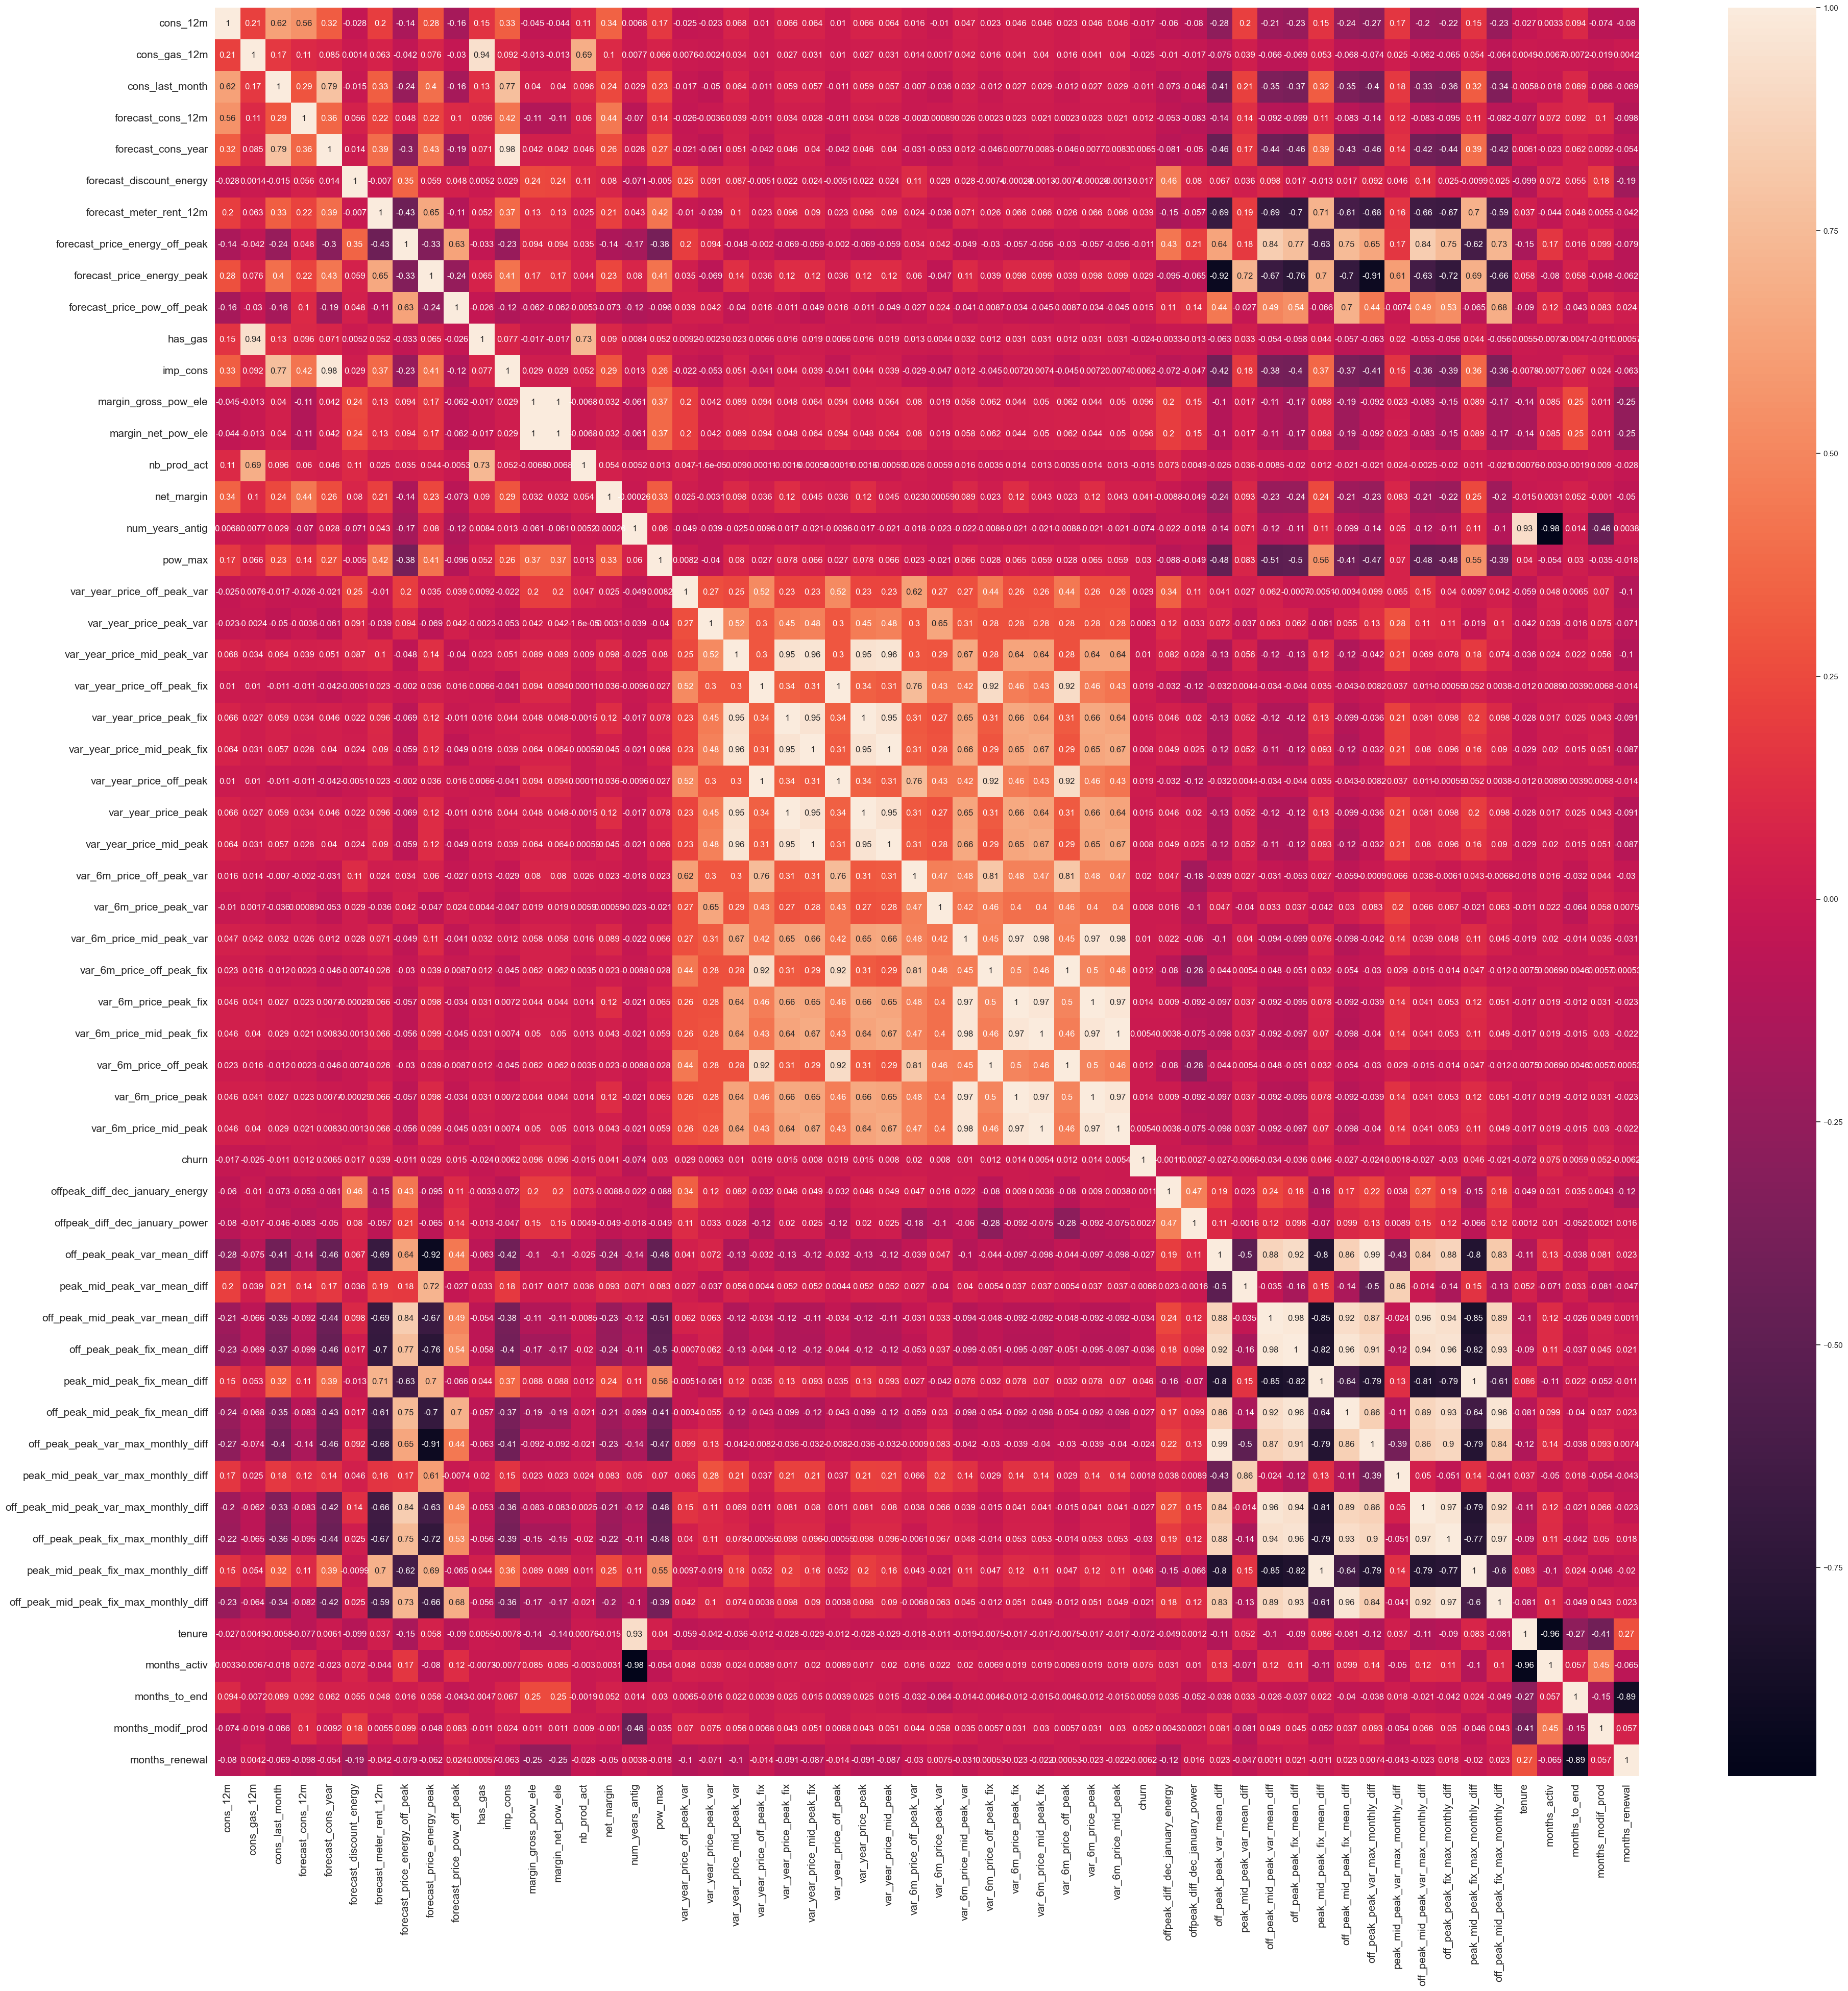

In [59]:
# First, filter out non-numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Calculate correlation on numeric columns only
correlation = numeric_df.corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Removing Highly Correlated Features

In this step, we removed six features that were found to be highly correlated with other independent variables. Including such redundant features can lead to multicollinearity, which violates the assumptions of many parametric models and can distort the interpretation of feature importance.

By eliminating these variables, we aim to simplify the model, reduce noise, and enhance learning performance.


In [60]:
df = df.drop(columns=[
    'off_peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff'
])



df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           0.000000            0.000000                       0.0   
1           2.280920            0.000000                       0.0   
2           1.689841            0.000000                       0.0   
3           2.382089            0.000000                       0.0   
4           2.650065            2.721811                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.237292                        0.145711   
2                 1.599009                        0.165794   
3                 1.318689                        0.146694   
4                 2.122969                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...          -2.003942       -6.307490   
1                    0.000000  ...         -76.346912       -4.040736   
2                    0.087899  ...         -68.528252       -8.508541   
3                    0.000000  ...         -69.086728       -9.067017   
4                    0.100015  ...         -71.583443       -9.789750   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 59 columns]

## 3. Modelling

With our engineered features prepared, we are now ready to begin building a predictive model. For this task, we will focus exclusively on training a `Random Forest` classifier.


In [61]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data Sampling

To evaluate our model’s ability to generalize to unseen data, we will split our dataset into training and test sets. This simulates a real-world scenario where the model must make predictions on new data it hasn't seen before. We'll use a 75-25% split, where 75% of the data is used for training and 25% is held out for testing.


In [62]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 57)
(14606,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 57)
(10954,)
(3652, 57)
(3652,)


### Model Training

We initialize a `RandomForestClassifier` with 1000 decision trees (`n_estimators=1000`) to ensure robustness and reduce variance in predictions. We then train the model using the training data (`X_train`, `y_train`).


In [64]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Model Prediction and Confusion Matrix

We generate predictions on the test set using the trained Random Forest model. Then, we compute the confusion matrix to evaluate performance. The matrix is flattened into four components:  
- `tn`: True Negatives  
- `fp`: False Positives  
- `fn`: False Negatives  
- `tp`: True Positives  
These values help assess classification accuracy, precision, recall, and other key metrics.


In [65]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

### Checking Class Distribution in Test Set

We inspect the distribution of classes in the test set using `value_counts()`. This helps identify class imbalance, which is important when interpreting model performance—especially for metrics like precision, recall, and F1-score.


In [66]:
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

We observe that the test set is imbalanced, with 3,286 non-churn cases and only 366 churn cases. This imbalance can bias the model toward predicting the majority class (non-churn), so evaluation metrics beyond accuracy (such as precision, recall, and F1-score) are important for assessing performance.


Here, we evaluate the performance of the trained Random Forest model using key classification metrics:

- **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)** are extracted from the confusion matrix.
- **Accuracy** gives the overall correctness of the model.
- **Precision** shows the proportion of predicted churns that were actual churns.
- **Recall** (or sensitivity) indicates how well the model captures actual churners.

These metrics help assess how well the model handles the class imbalance in the test data.


In [67]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 17
False positives: 3
True negatives: 3283
False negatives: 349

Accuracy: 0.9036144578313253
Precision: 0.85
Recall: 0.04644808743169399


### Model Evaluation Summary

- **Accuracy**: 90.34% — The model correctly classifies the majority of the cases, indicating reliable performance on overall prediction.
- **Precision**: 0.85% — The precision value reflects the challenge of predicting churners in a highly imbalanced dataset.
- **Recall**: 4.64% — The recall highlights the opportunity to further optimize the model’s ability to identify churners.

Given the class imbalance (with churners being a small minority), these results are expected. Next steps could include techniques like resampling or tuning hyperparameters to enhance minority class detection while maintaining overall model robustness.


### Feature Importance Extraction

Here, we compute and sort the importance of each feature used by the trained Random Forest model. This helps identify which variables contributed most to the model’s decision-making, providing insight into key drivers of churn prediction.


In [68]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


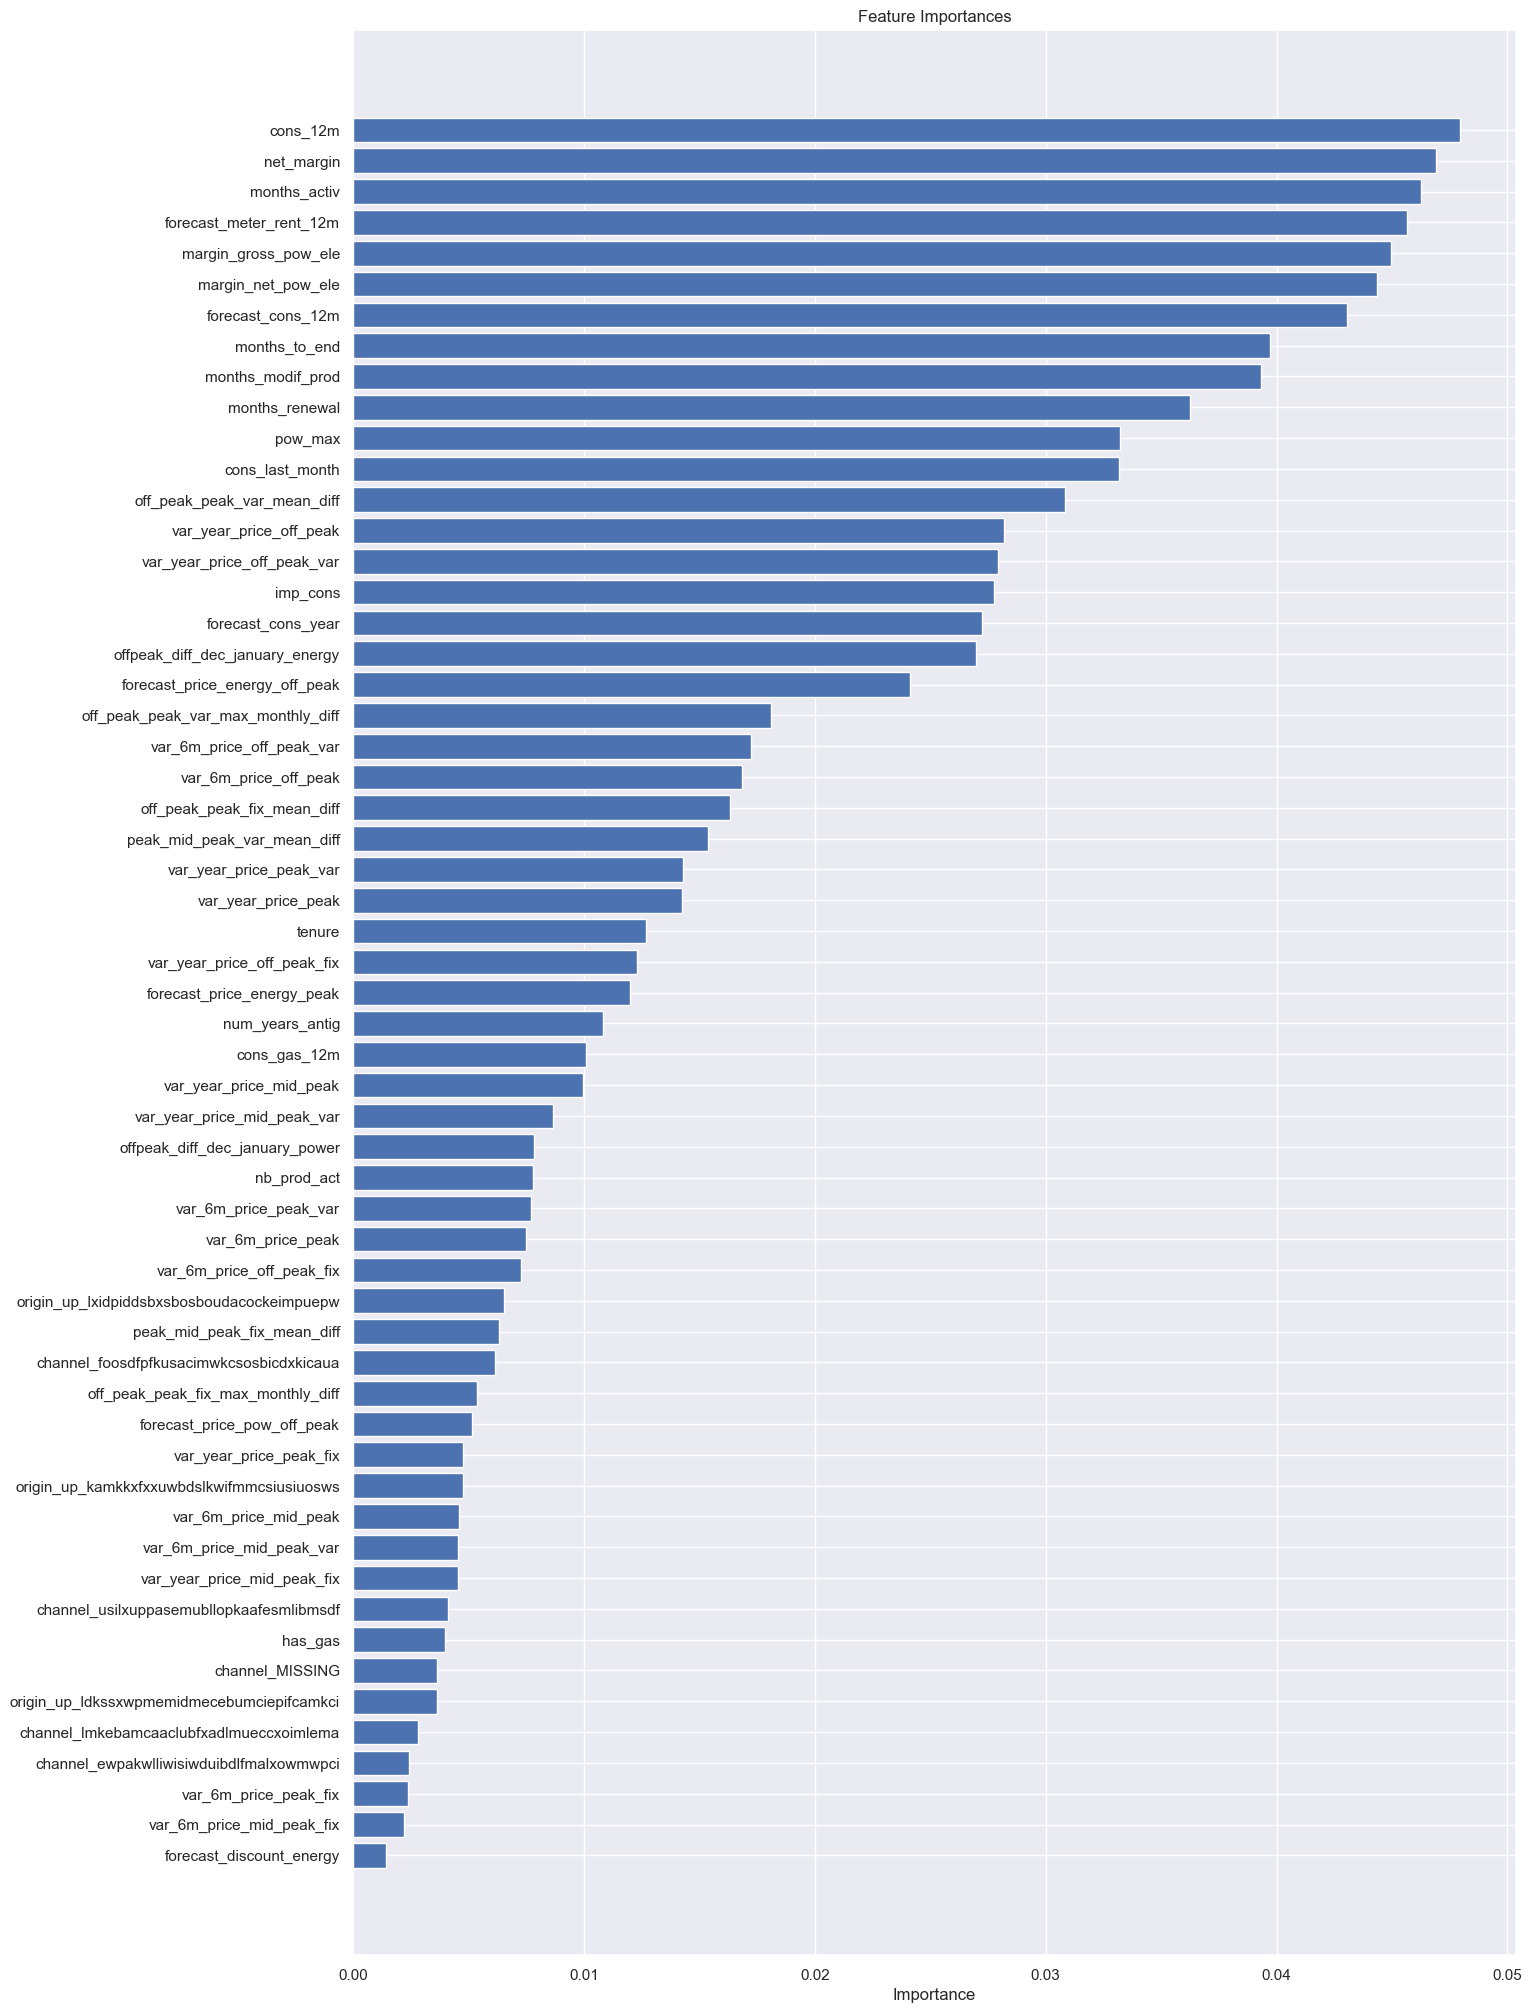

In [69]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

### Interpreting Feature Importances

After training our Random Forest model, we analyzed the feature importances to determine which variables had the most influence on the model’s predictions.

From the plot, we observe that the top contributing features include `cons_12m`, `net_margin`, `forecast_meter_rent_12m`, and `months_activ`. These variables likely capture meaningful consumption behaviors and financial indicators relevant to predicting customer churn.

Many of our engineered features, such as `months_to_end`, `margin_net_pow_ele`, and `months_modif_prod`, also ranked highly, validating the feature engineering efforts.

At the lower end of the ranking, some categorical dummy variables and volatility-based features show minimal importance, which is expected due to their limited variability or rare occurrence.

This insight helps us prioritize impactful features and informs future feature selection strategies to improve model performance.


### Generating Class Probabilities

Instead of predicting binary class labels (0 or 1), we can use the `.predict_proba()` method to obtain the predicted probability for each class. In this case, we extract the probability of churn (class 1) for each observation in the test set.

This allows us to rank customers by their likelihood of churning and supports more nuanced decision-making, such as setting custom thresholds or prioritizing outreach to high-risk customers.


In [70]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [71]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [72]:
X_test = X_test.reset_index(drop=True)
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.head()


cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  4.173390      4.193598         3.165541           3.168368   
1  4.075036      0.000000         3.003461           3.305998   
2  3.848435      0.000000         0.000000           2.756568   
3  4.345433      0.000000         0.000000           3.516690   
4  4.185655      0.000000         3.355834           3.208148   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            3.165541                       0.0                 2.073828   
1            3.003461                      30.0                 1.255031   
2            0.000000                       0.0                 1.289366   
3            0.000000                       0.0                 1.304921   
4            3.355834                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114667                    0.099548   
1                        0.198096                    0.000000   
2                        0.141434                    0.000000   
3                        0.142996                    0.000000   
4                        0.120372                    0.103487   

   forecast_price_pow_off_peak  ...  channel_MISSING  \
0                    40.606701  ...            False   
1                    46.305378  ...            False   
2                    44.311378  ...            False   
3                    44.311378  ...            False   
4                    40.606701  ...            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                      True   
3                                      True   
4                                      True   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                        True   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  
0                                        True      0              0.115  
1                                        True      0              0.172  
2                                        True      0              0.034  
3                                        True      0              0.070  
4                                       False      0              0.063  

[5 rows x 59 columns]

In [73]:
X_test.tail()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
3647  6.298161      5.541745         5.270979           3.310600   
3648  3.608633      4.009323         2.838219           2.782859   
3649  4.956725      0.000000         3.798374           3.935728   
3650  3.931966      3.509874         2.352183           2.914845   
3651  3.441852      0.000000         0.000000           2.360006   

      forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
3647            3.290257                       0.0                 1.300378   
3648            2.838219                       0.0                 1.291591   
3649            3.798374                       0.0                 2.544006   
3650            2.352183                       0.0                 1.288249   
3651            0.000000                       0.0                 1.229938   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
3647                        0.165022                    0.086380   
3648                        0.144038                    0.000000   
3649                        0.101700                    0.092659   
3650                        0.140621                    0.000000   
3651                        0.146694                    0.000000   

      forecast_price_pow_off_peak  ...  channel_MISSING  \
3647                    44.311378  ...             True   
3648                    45.811378  ...             True   
3649                    58.995952  ...            False   
3650                    44.311378  ...            False   
3651                    44.311378  ...            False   

      channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
3647                                     False   
3648                                     False   
3649                                     False   
3650                                     False   
3651                                      True   

      channel_foosdfpfkusacimwkcsosbicdxkicaua  \
3647                                     False   
3648                                     False   
3649                                      True   
3650                                     False   
3651                                     False   

      channel_lmkebamcaaclubfxadlmueccxoimlema  \
3647                                     False   
3648                                     False   
3649                                     False   
3650                                      True   
3651                                     False   

      channel_usilxuppasemubllopkaafesmlibmsdf  \
3647                                     False   
3648                                     False   
3649                                     False   
3650                                     False   
3651                                     False   

      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
3647                                        True   
3648                                       False   
3649                                       False   
3650                                       False   
3651                                       False   

      origin_up_ldkssxwpmemidmecebumciepifcamkci  \
3647                                       False   
3648                                       False   
3649                                       False   
3650                                       False   
3651                                        True   

      origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  
3647                                       False      0              0.020  
3648                                        True      0              0.102  
3649                                        True      0              0.159  
3650                                        True      0              0.065  
3651                                       False      0              0.058  

[5 rows x 59 columns]

## Project Summary: Predicting Customer Churn Using Random Forest

In this notebook, we developed a machine learning pipeline to predict customer churn using engineered features and a Random Forest Classifier. The process followed several key steps:

### 1. Feature Engineering  
We created and transformed features to improve predictive performance:
- **Price Volatility Features**: Captured differences in energy pricing across time (e.g., between December and January, and between peak/off-peak periods).
- **Tenure-Based Features**: Transformed `date_activ` and `date_end` into variables like `months_activ`, `months_to_end`, `months_modif_prod`, and `months_renewal`, reflecting customer lifecycle behavior.
- **Boolean & Categorical Transformation**: Converted binary categorical columns (like `has_gas`) into numeric format and used one-hot encoding for categorical variables like `channel_sales` and `origin_up`, removing rare categories to avoid sparsity.
- **Numerical Transformations**: Applied logarithmic transformation to skewed features (e.g., `cons_12m`, `cons_gas_12m`, `cons_last_month`) to improve feature stability and help the model converge faster.
- **Correlation Analysis**: Identified and dropped highly correlated features that could introduce redundancy and violate model assumptions of independence.

### 2. Model Training  
We split the dataset using a **75-25%** train-test split and trained a **Random Forest Classifier** with 1000 estimators. This model was chosen for its robustness to feature scale and ability to handle high-dimensional data.

### 3. Model Evaluation  
We predicted churn on the test set and evaluated the model using:
- **Confusion Matrix** to extract True Positives, False Positives, True Negatives, and False Negatives.
- **Accuracy**, **Precision**, and **Recall** metrics to assess performance.  
Though recall was low (reflecting difficulty in capturing the minority class), we maintained high overall accuracy, suggesting reliable classification for the dominant class.

### 4. Feature Importance  
We examined the most influential features in the model. Variables such as `cons_12m`, `net_margin`, `forecast_meter_rent_12m`, and tenure-related features appeared as strong predictors of churn behavior.

### 5. Output Predictions  
We generated churn predictions and their associated probabilities and appended them to the test dataset for interpretation. The final output was displayed directly in the notebook to facilitate analysis without exporting to a CSV.

This end-to-end pipeline serves as a solid foundation for evaluating churn risk and can be further enhanced through hyperparameter tuning, model ensembling, or advanced sampling techniques to improve performance on imbalanced classes.
